# Import necessary libraries

In [16]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

import pandas as pd
import numpy as np
from scipy import signal

from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.stats.stattools import durbin_watson
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer

from sklearn.linear_model import LinearRegression
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline, make_pipeline

# Read the data

In [17]:
# read csv
df = pd.read_csv('Life_Expectancy_Data.csv')

## About the data

The Global Health Observatory (GHO) data repository under World Health Organization (WHO) keeps track of the health status as well as many other related factors for all countries The datasets are made available to public for the purpose of health data analysis. The dataset related to life expectancy, health factors for 193 countries has been collected from the same WHO data repository website and its corresponding economic data was collected from United Nation website. Among all categories of health-related factors only those critical factors were chosen which are more representative. It has been observed that in the past 15 years , there has been a huge development in health sector resulting in improvement of human mortality rates especially in the developing nations in comparison to the past 30 years.


#### Feature information

| Heeader name                    | Description                                                              |
| ------------------------------- | -------------------------------------------------------------------------|
| Country                         | 193 countries in around the world                                        |
| Year                            | From 2000 to 2015                                                        |
| Status                          | Developed or Developing status                                           |
| Life expectancy                 | Life Expectancy in age                                                   |
| Adult Mortality                 | Adult Mortality Rates of both sexes (probability of dying between 15 and 60 years per 1000 population)                                     |
| infant deaths                   | Number of Infant Deaths per 1000 population                              |
| Alcohol                         | Alcohol, recorded per capita (15+) consumption (in litres of pure alcohol)                           |
| percentage expenditure          | Expenditure on health of Gross Domestic Product per capita(%)            |
| Hepatitis B                     | Hepatitis B (HepB) immunization coverage among 1-year-olds(%)           |
| Measles                         | Measles - number of reported cases per 1000 population                   |
| BMI                             | Average Body Mass Index of entire population                             |
| under-five deaths               | Number of under-five deaths per 1000 population                          |
| Polio                           | Polio (Pol3) immunization coverage among 1-year-olds (%)                 |
| Total expenditure               | General government expenditure on health as total (%)                    |
| Diphtheria                      | Diphtheria tetanus toxoid and pertussis immunization coverage among 1-year-olds (%)        |
| HIV/AIDS                        | Deaths per 1 000 live births HIV/AIDS (0-4 years)                        |
| GDP                             | Gross Domestic Product per capita (in USD)                               |
| Population                      | Population of the country                                                |
| thinness 1-19 years             | Prevalence of thinness among children and adolescents 10 to 19 Age (%)   |
| thinness 5-9 years              | Prevalence of thinness among children for Age 5 to 9(%)                  |
| Income composition of resources | Human Development Index of income composition of resources (0 to 1)              |
| Schooling                       | Number of years of Schooling(years)                                      |


In [18]:
# Đặt số lượng hàng và cột hiển thị là None (không giới hạn)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# show first 5 rows
df.head(5)

Country  Year      Status  Life expectancy  Adult Mortality  \
0  Afghanistan  2015  Developing             65.0            263.0   
1  Afghanistan  2014  Developing             59.9            271.0   
2  Afghanistan  2013  Developing             59.9            268.0   
3  Afghanistan  2012  Developing             59.5            272.0   
4  Afghanistan  2011  Developing             59.2            275.0   

   infant deaths  Alcohol  percentage expenditure  Hepatitis B  Measles   BMI  \
0             62     0.01               71.279624         65.0     1154  19.1   
1             64     0.01               73.523582         62.0      492  18.6   
2             66     0.01               73.219243         64.0      430  18.1   
3             69     0.01               78.184215         67.0     2787  17.6   
4             71     0.01                7.097109         68.0     3013  17.2   

   under-five deaths  Polio  Total expenditure  Diphtheria  HIV/AIDS  \
0                 83    6.0               8.16        65.0       0.1   
1                 86   58.0               8.18        62.0       0.1   
2                 89   62.0               8.13        64.0       0.1   
3                 93   67.0               8.52        67.0       0.1   
4                 97   68.0               7.87        68.0       0.1   

          GDP  Population  thinness 1-19 years  thinness 5-9 years  \
0  584.259210  33736494.0                 17.2                17.3   
1  612.696514    327582.0                 17.5                17.5   
2  631.744976  31731688.0                 17.7                17.7   
3  669.959000   3696958.0                 17.9                18.0   
4   63.537231   2978599.0                 18.2                18.2   

   Income composition of resources  Schooling  
0                            0.479       10.1  
1                            0.476       10.0  
2                            0.470        9.9  
3                            0.463        9.8  
4                            0.454        9.5

## Number of rows and columns of the DataFrame

In [19]:
# get number of rows
num_rows = df.shape[0]

# get number of columns
num_cols = df.shape[1]

print('Number of rows:', num_rows)
print('Number of columns:', num_cols)


Number of rows: 2938
Number of columns: 22


## Data types of the columns


In [20]:
# get DataFrame info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10  BMI                              2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

## Check duplicates rows

In [21]:
# get number of duplicated rows
duplicated_rows = df.duplicated().sum()

# check if there are duplicated rows
if duplicated_rows > 0:
    print("Number of duplicated rows:", duplicated_rows)
else:
    print("No duplicated rows found")

No duplicated rows found


# Descriptive Statistic

In [22]:
df.describe().T

count          mean           std  \
Year                             2938.0  2.007519e+03  4.613841e+00   
Life expectancy                  2928.0  6.922493e+01  9.523867e+00   
Adult Mortality                  2928.0  1.647964e+02  1.242921e+02   
infant deaths                    2938.0  3.030395e+01  1.179265e+02   
Alcohol                          2744.0  4.602861e+00  4.052413e+00   
percentage expenditure           2938.0  7.382513e+02  1.987915e+03   
Hepatitis B                      2385.0  8.094046e+01  2.507002e+01   
Measles                          2938.0  2.419592e+03  1.146727e+04   
BMI                              2904.0  3.832125e+01  2.004403e+01   
under-five deaths                2938.0  4.203574e+01  1.604455e+02   
Polio                            2919.0  8.255019e+01  2.342805e+01   
Total expenditure                2712.0  5.938190e+00  2.498320e+00   
Diphtheria                       2919.0  8.232408e+01  2.371691e+01   
HIV/AIDS                         2938.0  1.742103e+00  5.077785e+00   
GDP                              2490.0  7.483158e+03  1.427017e+04   
Population                       2286.0  1.275338e+07  6.101210e+07   
thinness 1-19 years              2904.0  4.839704e+00  4.420195e+00   
thinness 5-9 years               2904.0  4.870317e+00  4.508882e+00   
Income composition of resources  2771.0  6.275511e-01  2.109036e-01   
Schooling                        2775.0  1.199279e+01  3.358920e+00   

                                        min            25%           50%  \
Year                             2000.00000    2004.000000  2.008000e+03   
Life expectancy                    36.30000      63.100000  7.210000e+01   
Adult Mortality                     1.00000      74.000000  1.440000e+02   
infant deaths                       0.00000       0.000000  3.000000e+00   
Alcohol                             0.01000       0.877500  3.755000e+00   
percentage expenditure              0.00000       4.685343  6.491291e+01   
Hepatitis B                         1.00000      77.000000  9.200000e+01   
Measles                             0.00000       0.000000  1.700000e+01   
BMI                                 1.00000      19.300000  4.350000e+01   
under-five deaths                   0.00000       0.000000  4.000000e+00   
Polio                               3.00000      78.000000  9.300000e+01   
Total expenditure                   0.37000       4.260000  5.755000e+00   
Diphtheria                          2.00000      78.000000  9.300000e+01   
HIV/AIDS                            0.10000       0.100000  1.000000e-01   
GDP                                 1.68135     463.935626  1.766948e+03   
Population                         34.00000  195793.250000  1.386542e+06   
thinness 1-19 years                 0.10000       1.600000  3.300000e+00   
thinness 5-9 years                  0.10000       1.500000  3.300000e+00   
Income composition of resources     0.00000       0.493000  6.770000e-01   
Schooling                           0.00000      10.100000  1.230000e+01   

                                          75%           max  
Year                             2.012000e+03  2.015000e+03  
Life expectancy                  7.570000e+01  8.900000e+01  
Adult Mortality                  2.280000e+02  7.230000e+02  
infant deaths                    2.200000e+01  1.800000e+03  
Alcohol                          7.702500e+00  1.787000e+01  
percentage expenditure           4.415341e+02  1.947991e+04  
Hepatitis B                      9.700000e+01  9.900000e+01  
Measles                          3.602500e+02  2.121830e+05  
BMI                              5.620000e+01  8.730000e+01  
under-five deaths                2.800000e+01  2.500000e+03  
Polio                            9.700000e+01  9.900000e+01  
Total expenditure                7.492500e+00  1.760000e+01  
Diphtheria                       9.700000e+01  9.900000e+01  
HIV/AIDS                         8.000000e-01  5.060000e+01  
GDP            

In [23]:
# get number of unique values of Country column
df.describe(include=['O']).T

count unique          top  freq
Country  2938    193  Afghanistan    16
Status   2938      2   Developing  2426

## Handle missing values


In [24]:
# check missing values
df.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
BMI                                 34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
HIV/AIDS                             0
GDP                                448
Population                         652
thinness 1-19 years                 34
thinness 5-9 years                  34
Income composition of resources    167
Schooling                          163
dtype: int64

In [25]:
# calculate missing percentage
missing_percentage = df.isnull().mean() * 100
missing_percentage[missing_percentage.values > 0].sort_values(ascending=False)

Population                         22.191967
Hepatitis B                        18.822328
GDP                                15.248468
Total expenditure                   7.692308
Alcohol                             6.603131
Income composition of resources     5.684139
Schooling                           5.547992
BMI                                 1.157250
thinness 1-19 years                 1.157250
thinness 5-9 years                  1.157250
Polio                               0.646698
Diphtheria                          0.646698
Life expectancy                     0.340368
Adult Mortality                     0.340368
dtype: float64

In [26]:
# List of columns to impute
cols_to_impute = ['Life expectancy', 'Adult Mortality', 'Alcohol',
                  'Hepatitis B', 'BMI', 'Polio', 'Total expenditure',
                  'Diphtheria', 'GDP', 'Population', 'thinness 1-19 years',
                  'thinness 5-9 years', 'Income composition of resources',
                  'Schooling']

# Loop over columns and impute missing values with the mean of the same year
for col in cols_to_impute:
    df[col] = df.groupby('Year')[col].transform(lambda x: x.fillna(x.mean()))

In [27]:
# check missing values again
df.isnull().sum()

Country                            0
Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
BMI                                0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
HIV/AIDS                           0
GDP                                0
Population                         0
thinness 1-19 years                0
thinness 5-9 years                 0
Income composition of resources    0
Schooling                          0
dtype: int64

In [28]:
df.to_csv('LE_cleaned_data.csv', index=False)

## Correlation


C:\Users\THANH PHU\AppData\Local\Temp\ipykernel_23404\2710845688.py:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()
C:\Users\THANH PHU\AppData\Local\Temp\ipykernel_23404\2710845688.py:9: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),


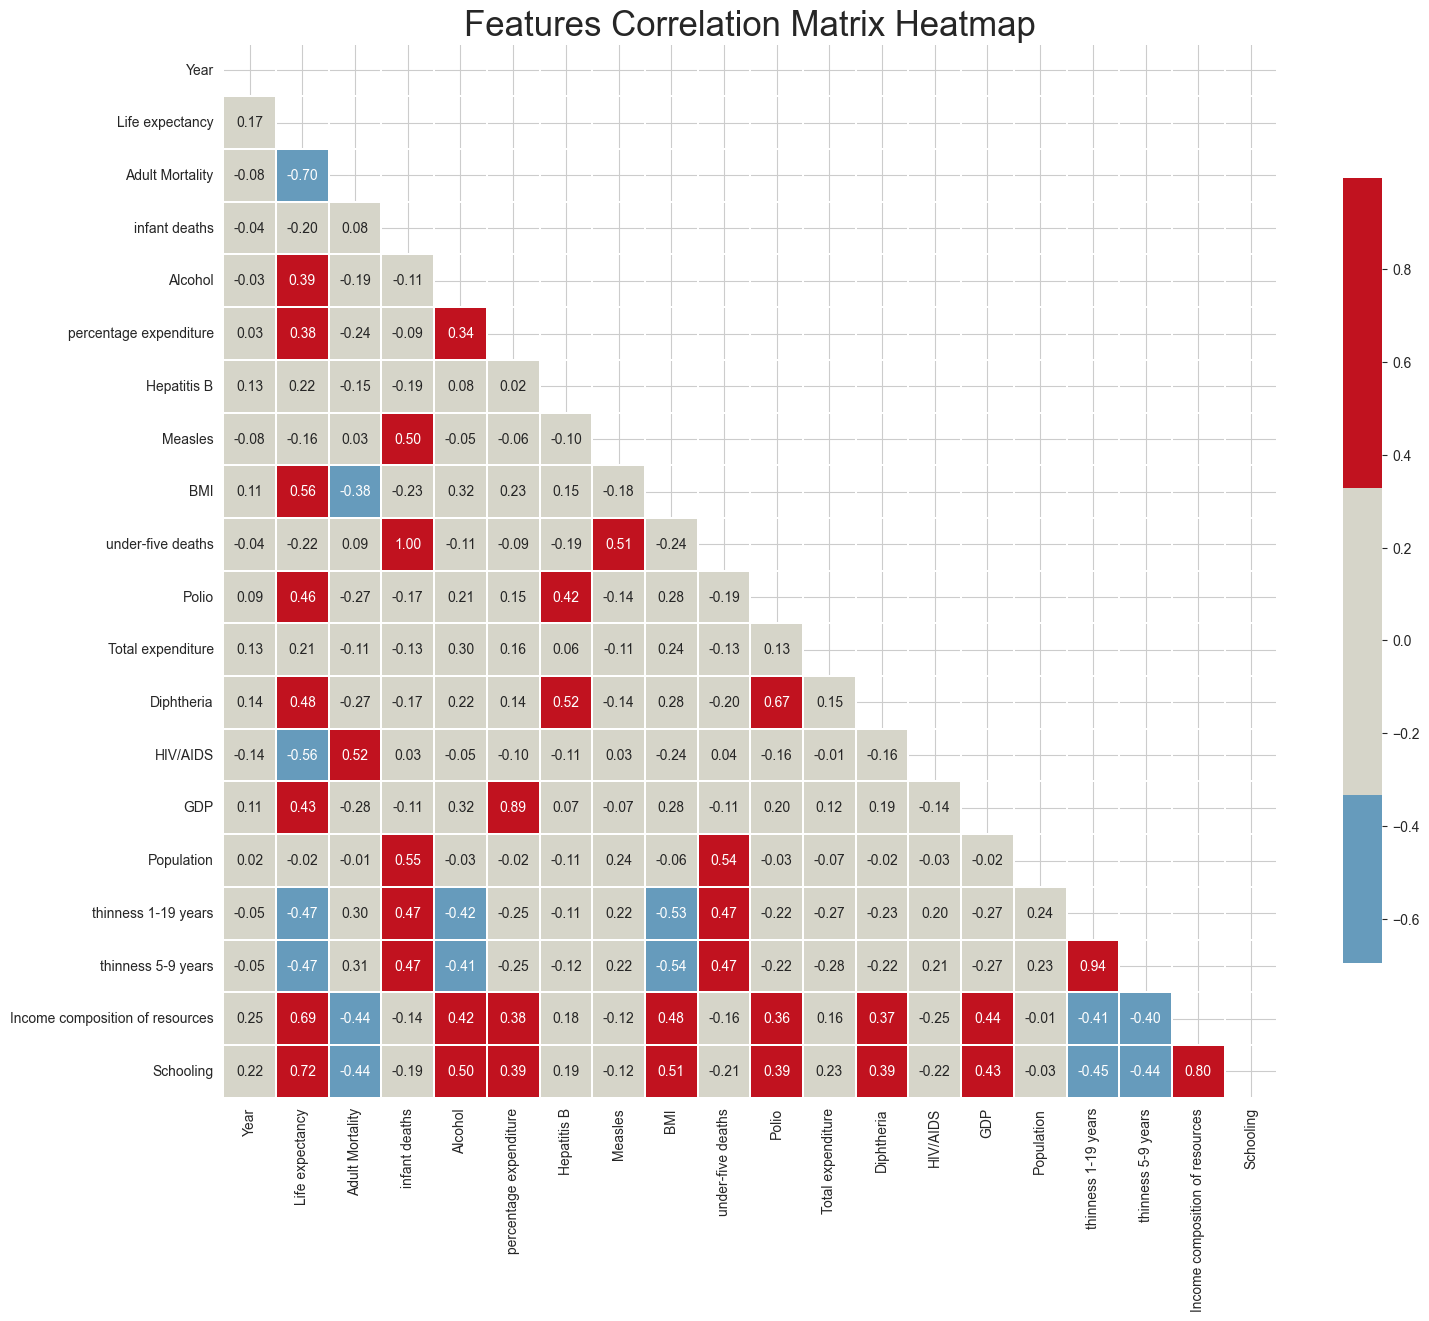

In [84]:
#Plot Matrix of Correlation
plt.figure(figsize=(17,17))

heatmap_colors = ['#669bbc', '#d6d5c9', '#c1121f']

corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))

sns.heatmap(df.corr(), 
            mask=mask,
            center=0,
            annot=True,
            fmt='.2f',
            cmap=heatmap_colors,
            square=True,
            linewidths=.2,
            cbar_kws={"shrink": .6})

plt.title('Features Correlation Matrix Heatmap', fontsize=25);

#### Conclusion: 
- The correlation matrix shows that the target has a high positive correlation with the features 'Schooling', 'Income composition of resources', and 'BMI', and a high negative correlation with the features 'Adult mortality' and 'HIV/AIDS'.
- It is worth noting that the features 'Schooling' and 'Income composition of resources' also have a high correlation between them, as do 'Adult mortality' and 'HIV/AIDS'.

<Axes: >

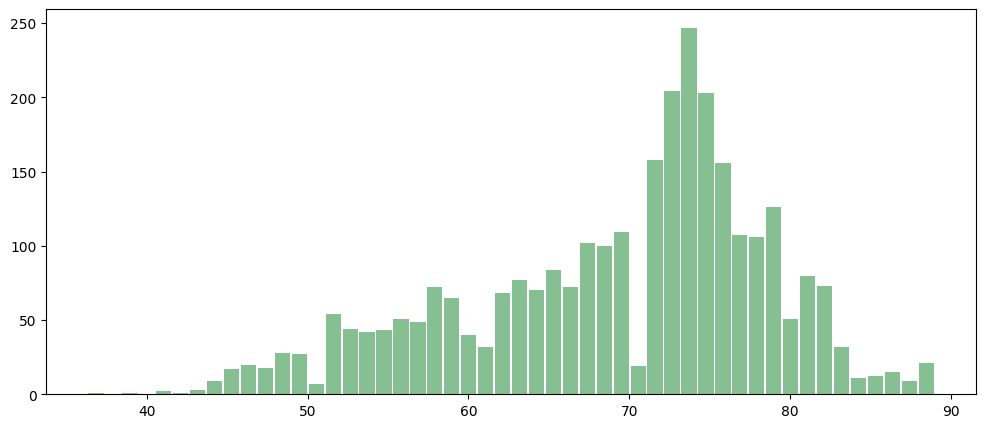

In [31]:
# histogram of Life expectancy
df['Life expectancy'].hist(bins=50, figsize=(
    12, 5), color='#86bf91', grid=False, zorder=2, rwidth=0.9)

# Data Exploration

## Univariate analysis
In this part, we just explore common factors which may affect directly to life expectancy such as:
- `Life expectancy`: of course, how can we not analysis this variable
- `Status`: Easily, we can think that developed countris's life expectancy may be higher than developing one\
- `Population`: longer life, denser population
- `GDP`: higher GDP, goverment could spend more money for medical and people have more money for their health
- `BMI`: a basic indicator for country health.

### Life expectancy

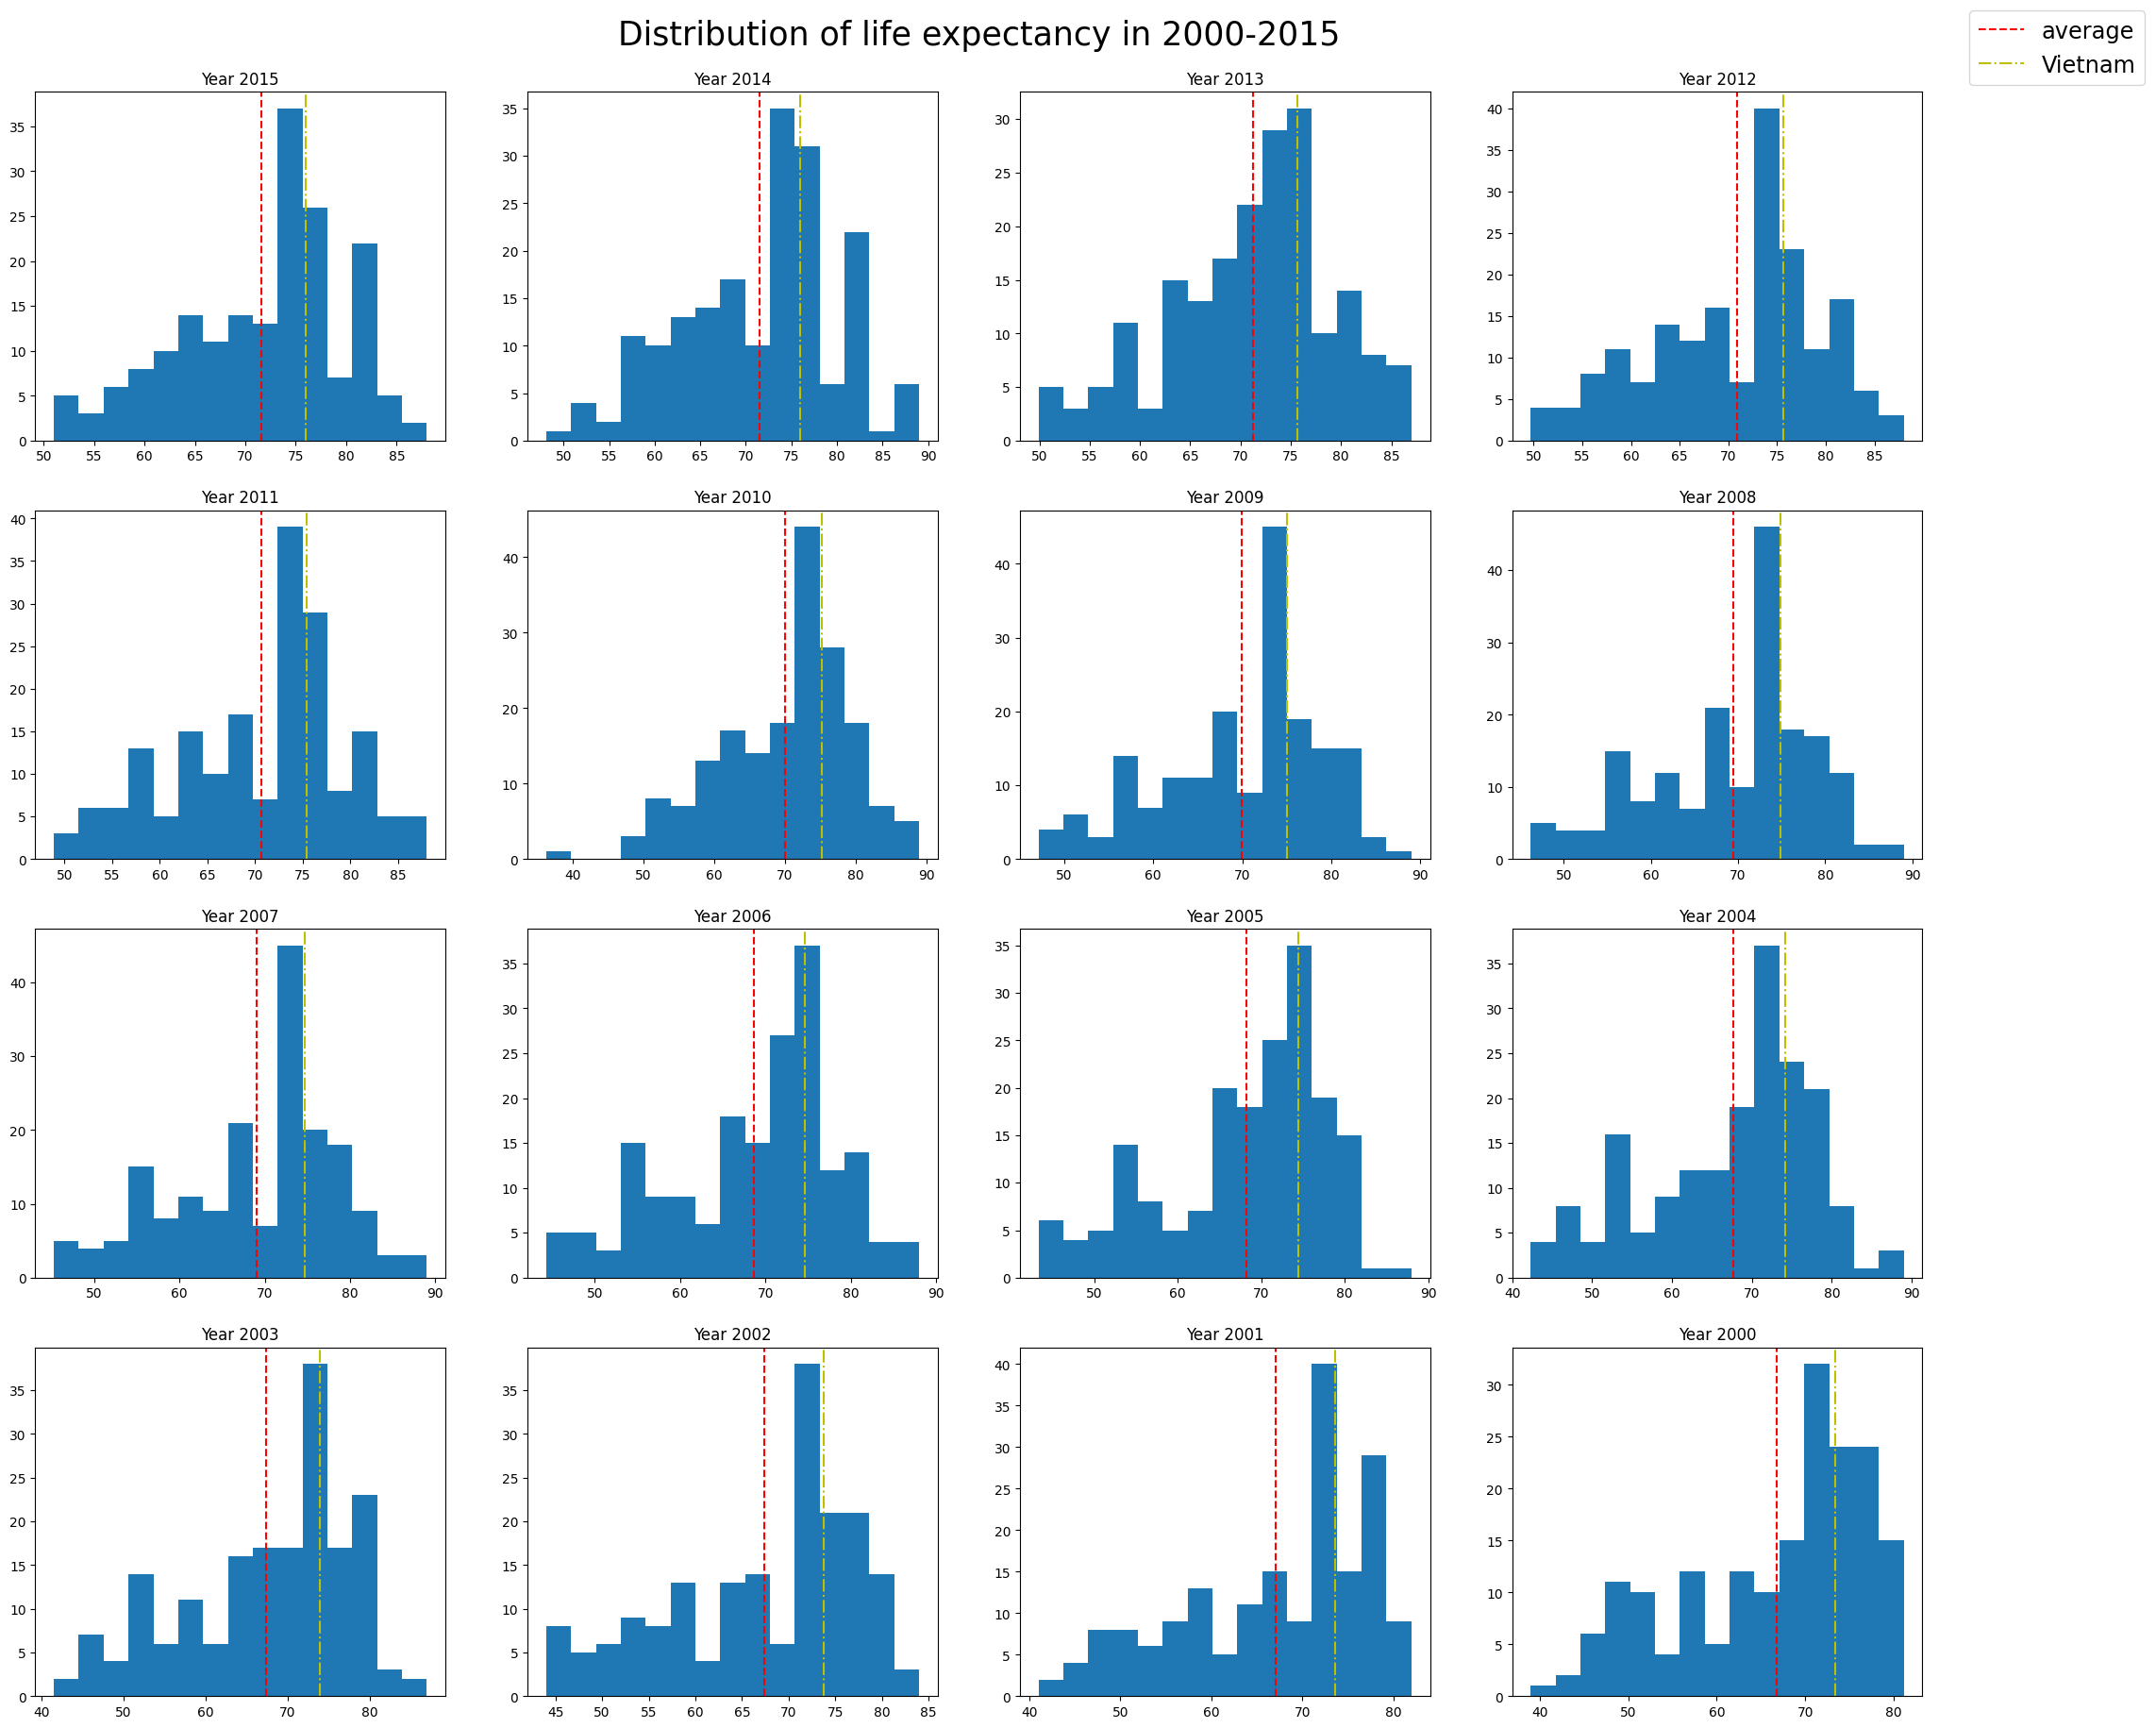

In [32]:
fig, axes = plt.subplots(4, 4, figsize=(25, 20))

years = pd.unique(df.Year)
for i in range(len(years)):
    LE_year = df.loc[df.Year == years[i], ['Country', 'Life expectancy']]
    ax = axes[i // 4][i - 4*(i // 4)]
    ax.hist(LE_year['Life expectancy'], bins=15)
    ax.axvline(LE_year['Life expectancy'].mean(), c='r', linestyle='--', label='average')
    ax.axvline(LE_year.loc[df.Country == 'Viet Nam', 'Life expectancy'].values[0], c='y', linestyle='-.', label='Vietnam')
    ax.set_title(f'Year {years[i]}')

fig.suptitle('Distribution of life expectancy in 2000-2015', horizontalalignment='center', verticalalignment='center', fontsize = 25)
handles, labels = axes[0, 0].get_legend_handles_labels()
fig.legend(handles, labels, fontsize='xx-large')

plt.subplots_adjust(top=0.95, bottom=0.1, left=0.1, right=0.9, hspace=0.2)
plt.show();

Comment:
- It may not follow the normal distribution.
- Life expectation (LE) in the world is from 40 to over 85 with the higher rate is in 70-75 years old.
- Most of life expectation in the world is higher than mean.
- LE of Viet Nam is about 73 and always higher than average LE.
- In the late of 2000-2015 duration, the LE increase lower bound to 50.
- If thinking normally, the LE will increase by the time because of development of science and technology. However, if early year histograms are left skew (means that the long life rate is higher than short life) then the later year histograms are not skewed (means that the long life rate is decreased)

### Developed or Developing

In [33]:
ded_ding = pd.pivot_table(df, index='Status', columns='Year', aggfunc='size')
ded_ding

Year        2000  2001  2002  2003  2004  2005  2006  2007  2008  2009  2010  \
Status                                                                         
Developed     32    32    32    32    32    32    32    32    32    32    32   
Developing   151   151   151   151   151   151   151   151   151   151   151   

Year        2011  2012  2013  2014  2015  
Status                                    
Developed     32    32    32    32    32  
Developing   151   151   161   151   151

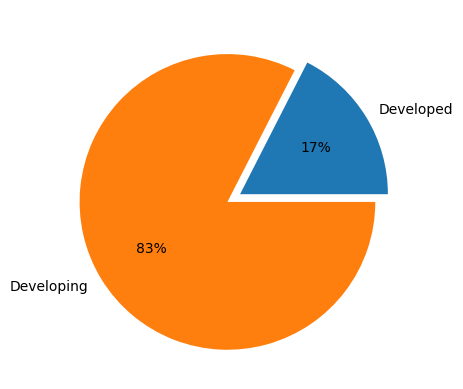

In [34]:
plt.pie(ded_ding[2000], labels=ded_ding.index.tolist(), explode=[0, 0.1], autopct='%0.0f%%')
plt.show()

- There are 32 developed countries and 151 developing one.
- Moreover, there is no country devoped to became a developed country in 2000-2015 duration

### Population

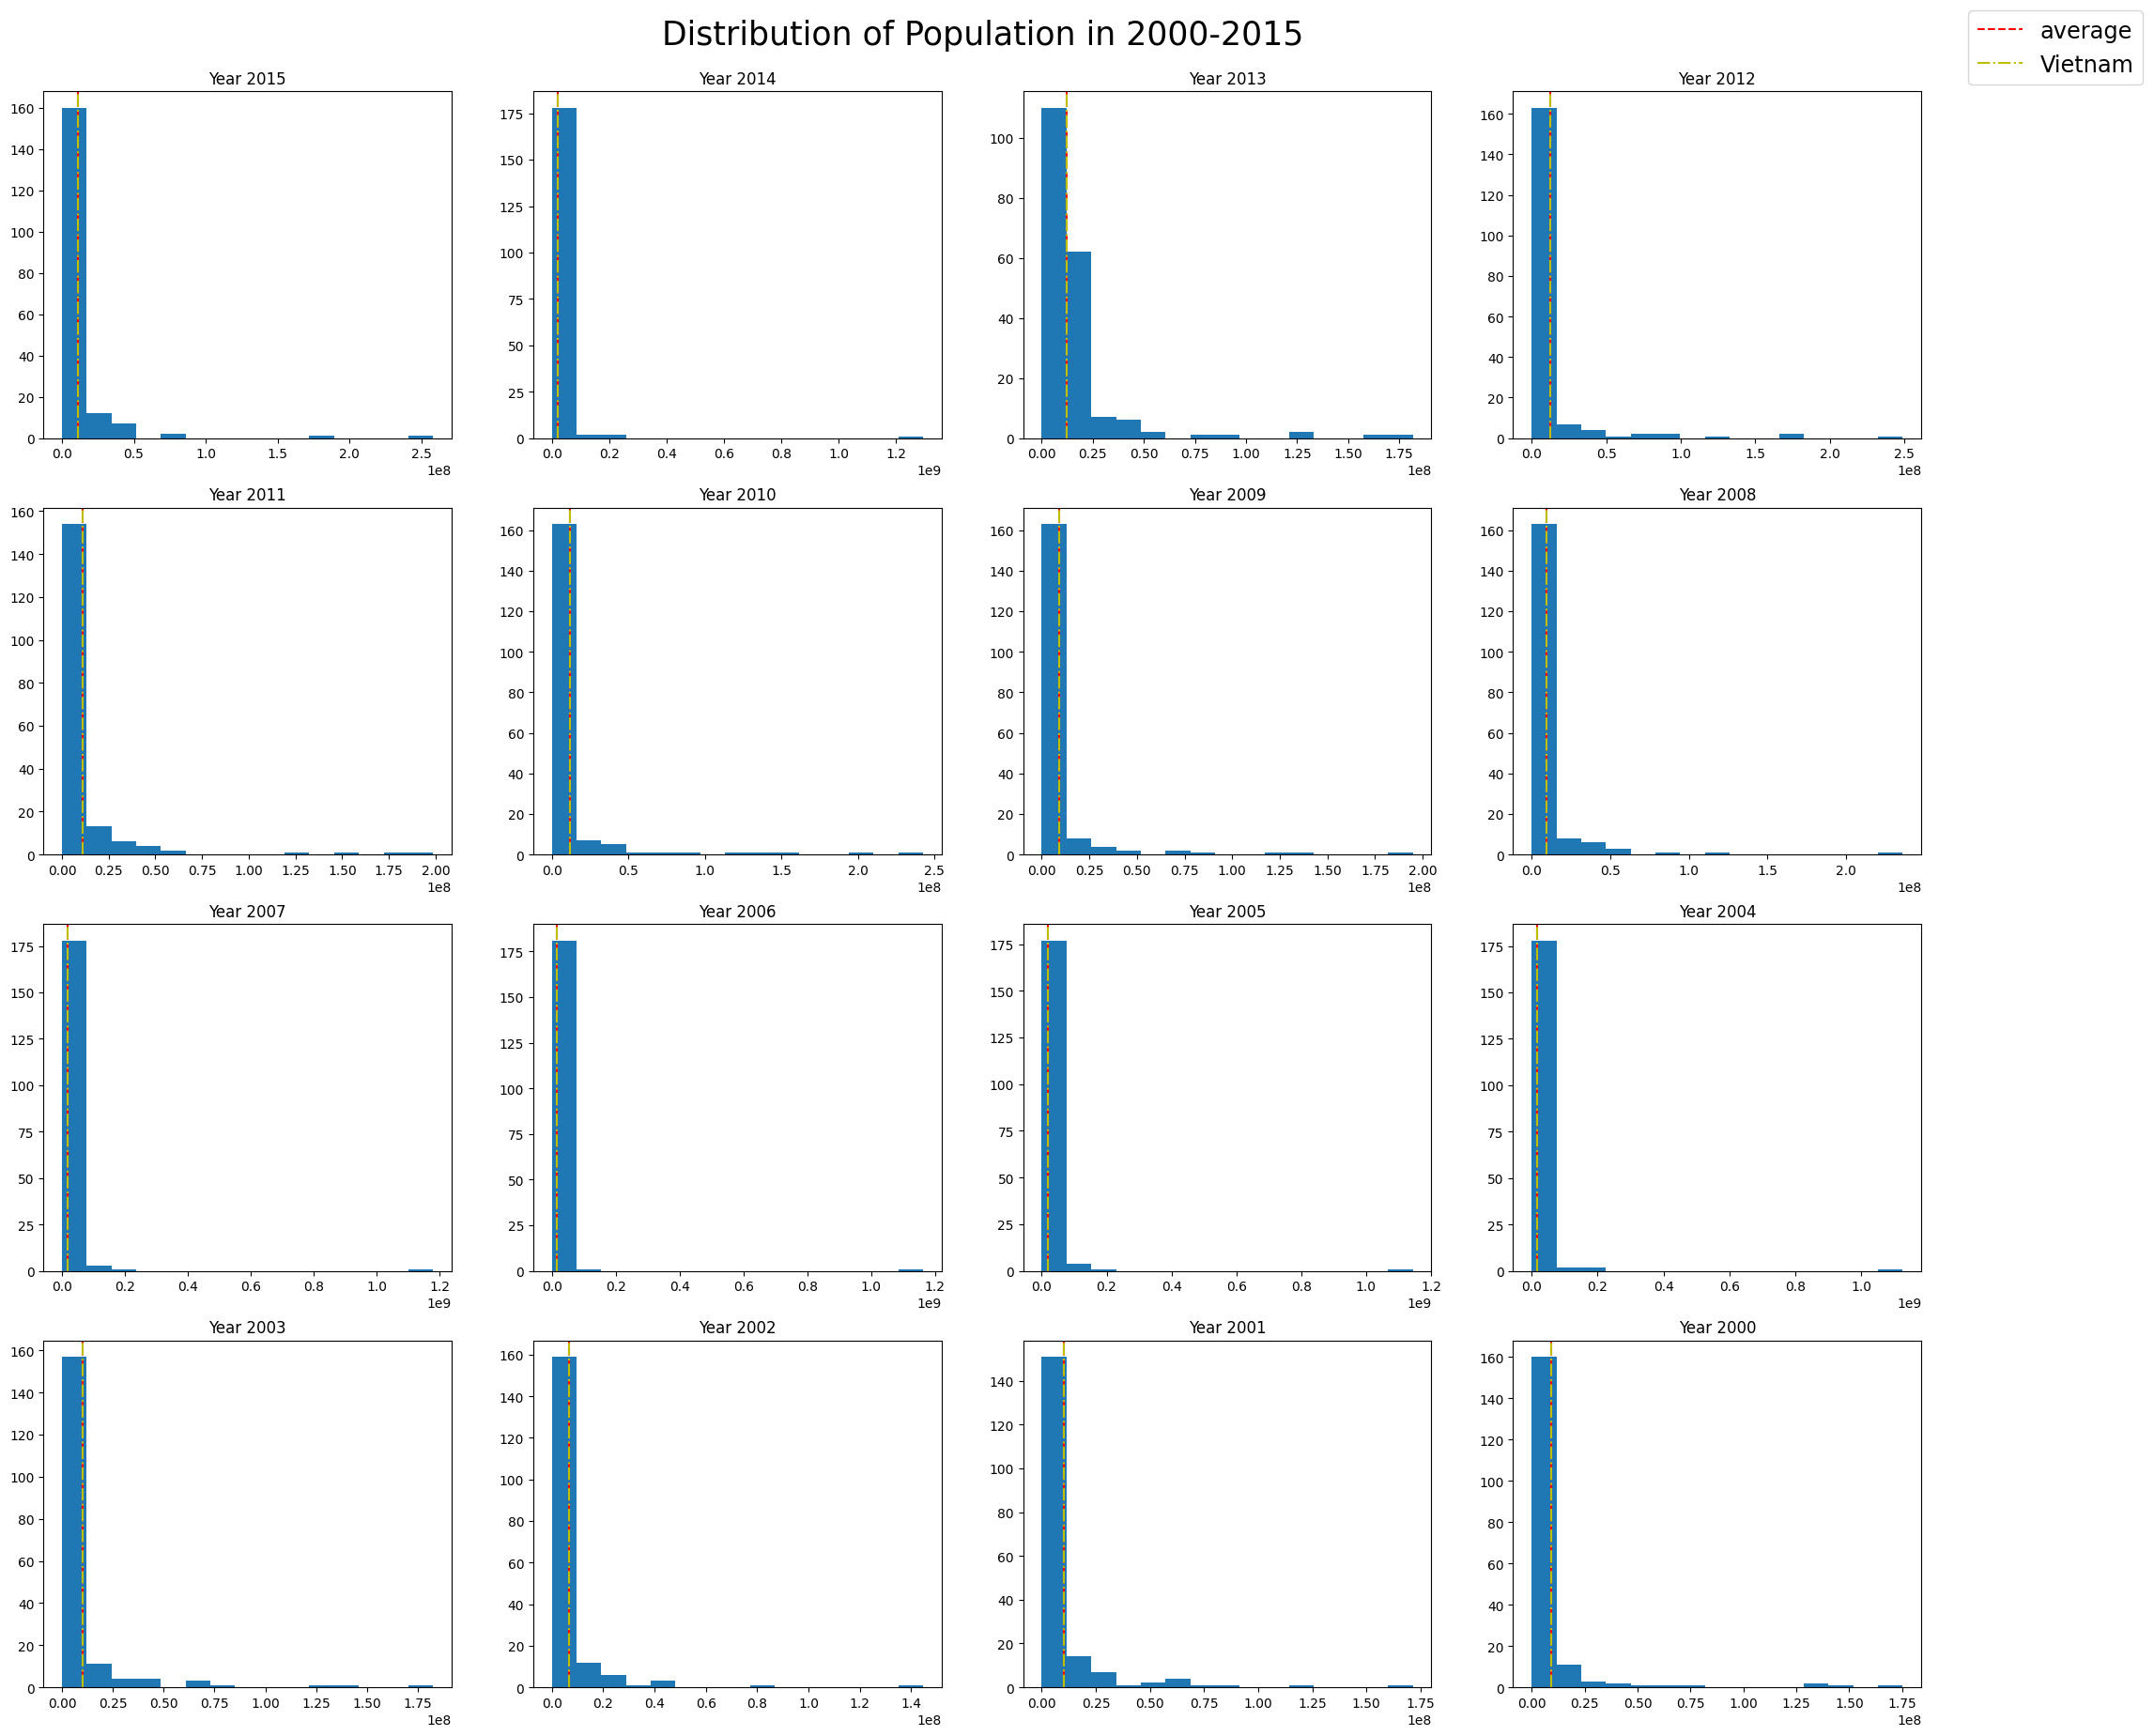

In [35]:
fig, axes = plt.subplots(4, 4, figsize=(25, 20))

for i in range(len(years)):
    population_year = df.loc[df.Year == years[i], ['Country', 'Population']]
    ax = axes[i // 4][i - 4*(i // 4)]
    ax.hist(population_year['Population'], bins=15)
    ax.axvline(population_year['Population'].mean(), c='r', linestyle='--', label='average')
    ax.axvline(population_year.loc[df.Country == 'Viet Nam', 'Population'].values[0], c='y', linestyle='-.', label='Vietnam')
    ax.set_title(f'Year {years[i]}')

fig.suptitle('Distribution of Population in 2000-2015', horizontalalignment='center', verticalalignment='center', fontsize = 25)
handles, labels = axes[0, 0].get_legend_handles_labels()
fig.legend(handles, labels, fontsize='xx-large')

plt.subplots_adjust(top=0.95, bottom=0.1, left=0.1, right=0.9, hspace=0.2)
plt.show();

In [36]:
average_population = df.groupby('Country', as_index=False)['Population'].mean()
pd.options.display.float_format = '{:,.2f}'.format
average_population.loc[average_population.Population > (0.5 * 1e8)]

Country     Population
22               Brazil  88,128,071.25
76                India 421,467,690.94
77            Indonesia 116,555,259.44
123             Nigeria  70,877,003.06
127            Pakistan  69,027,961.81
140  Russian Federation  59,762,085.62

**Comment:**
- Most countries in the world have a population of about 10 million people in 2000-2015 duration.
- Viet Nam is also like that.
- There are some outliers such as Brazil, India, Indonesia, Nigeria, Pakistan, and Russian Federation	

### GDP

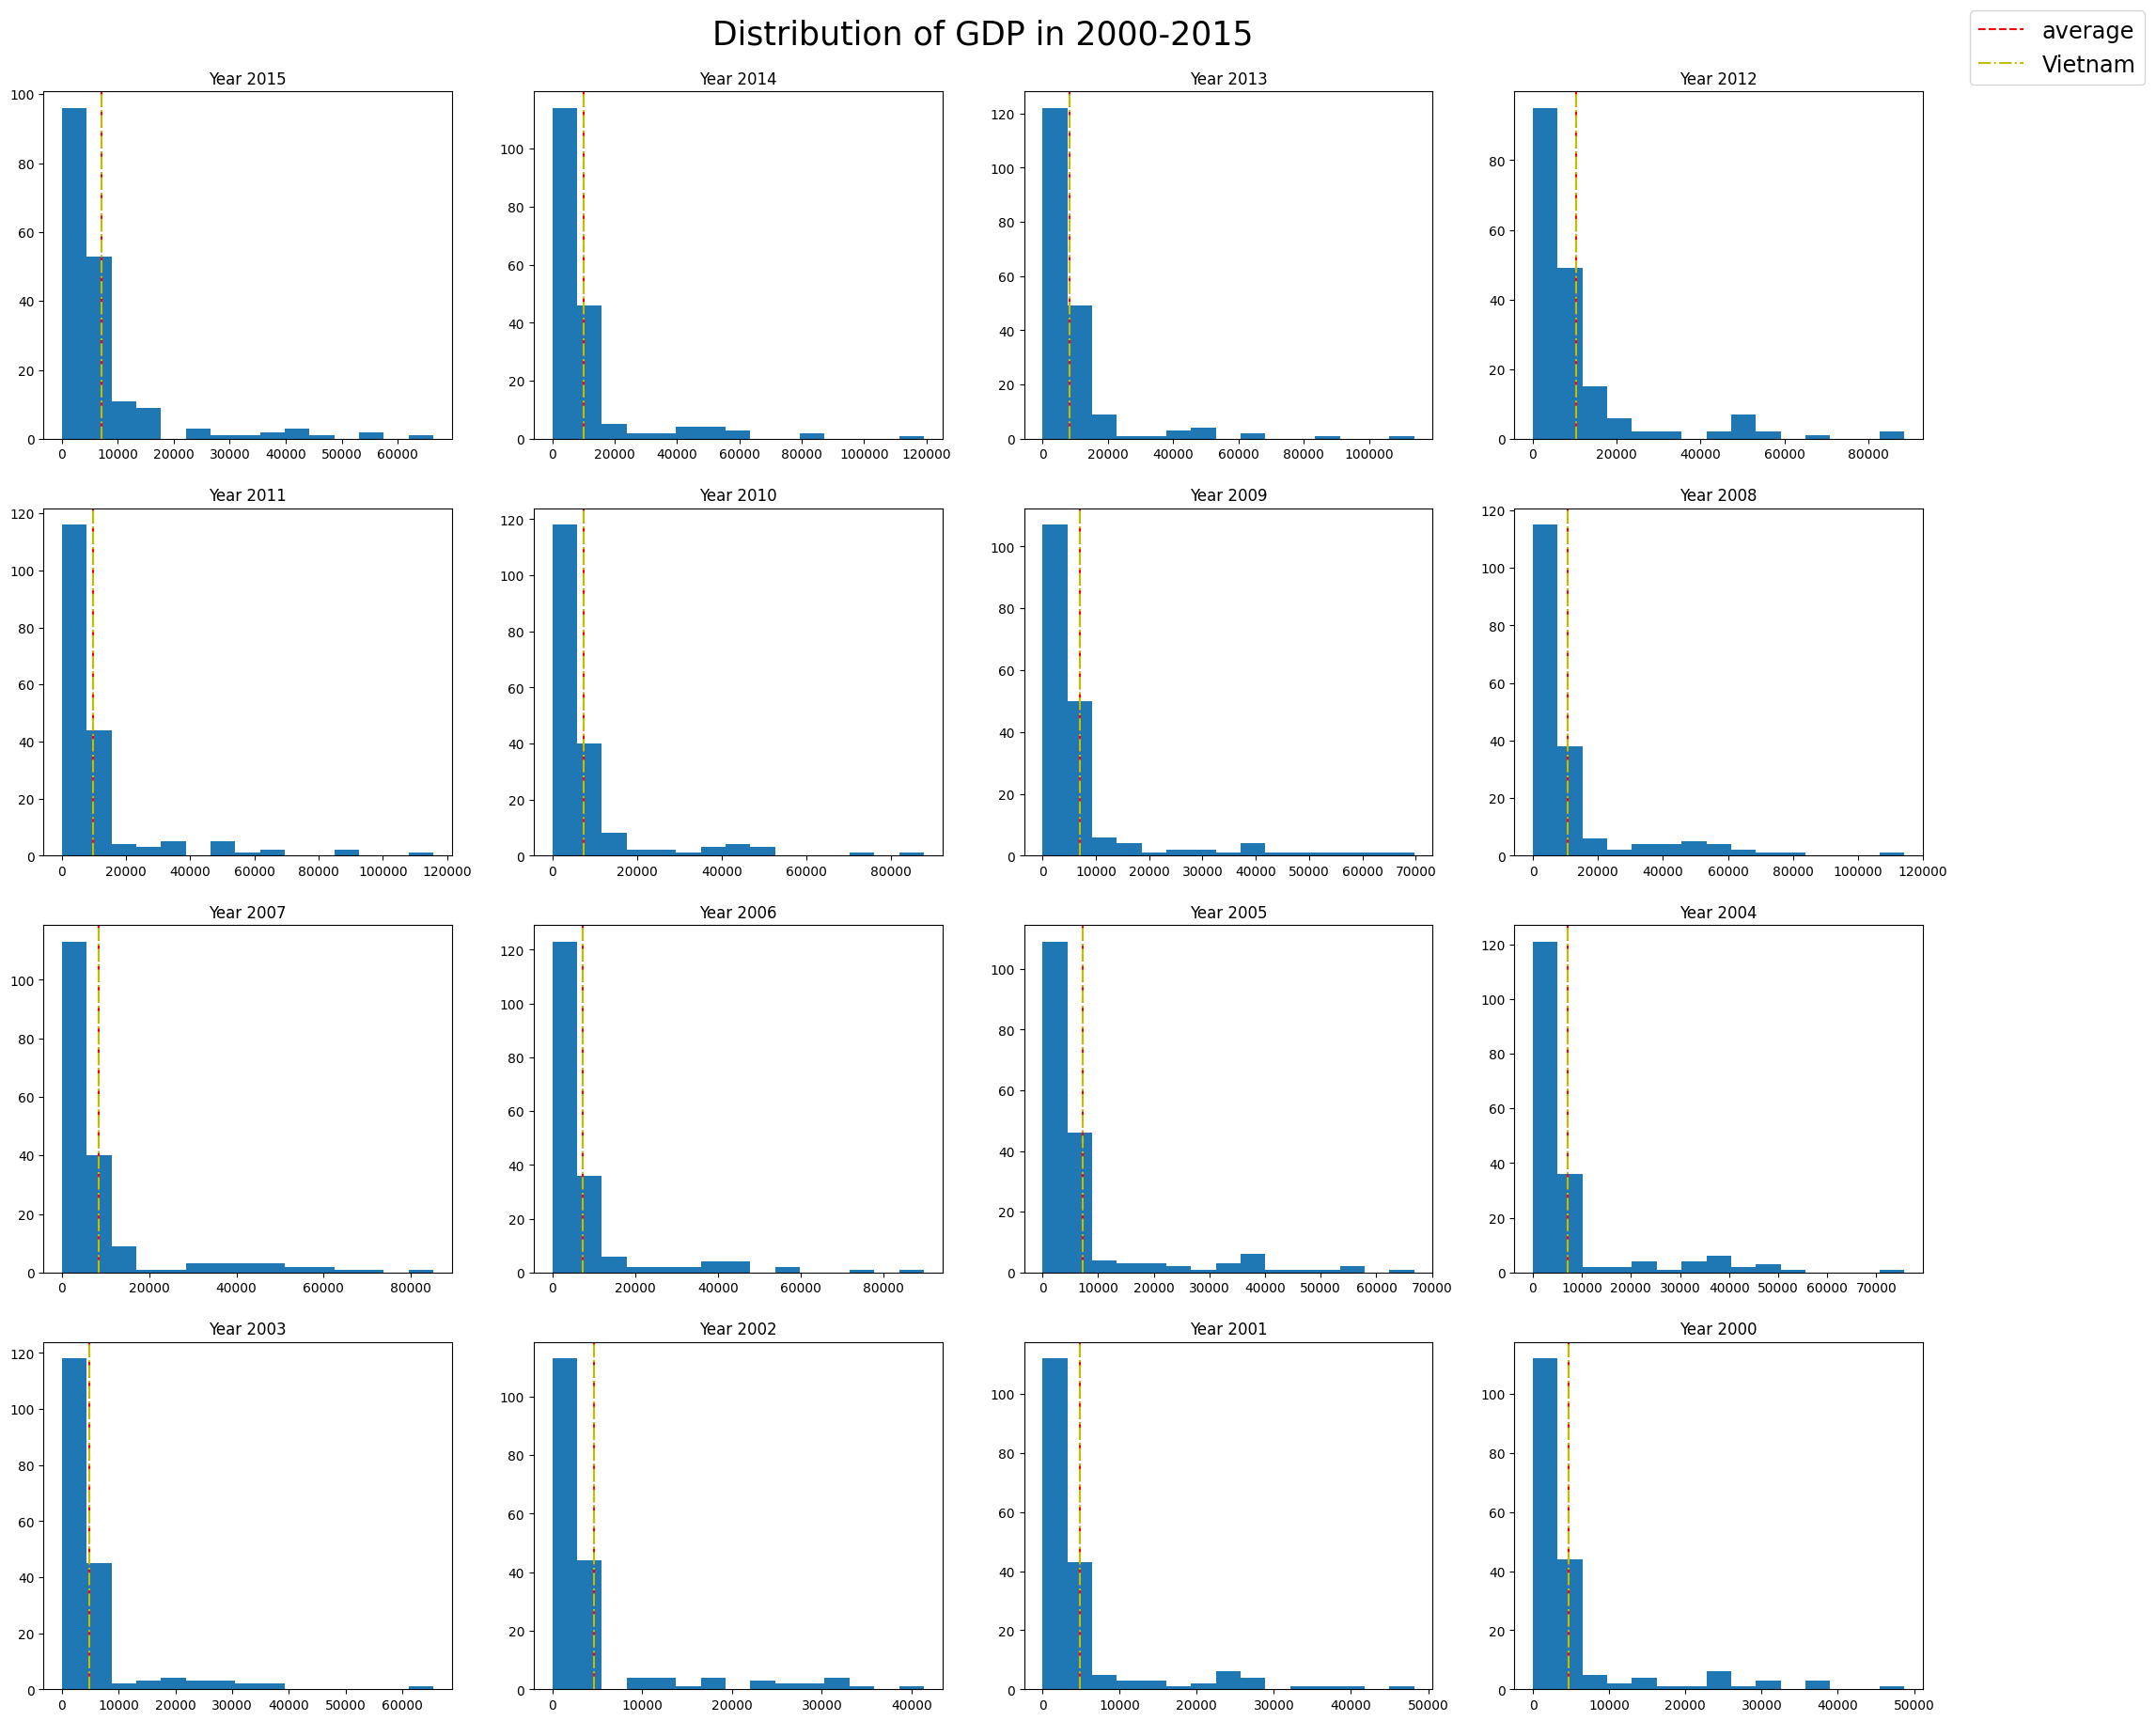

In [37]:
fig, axes = plt.subplots(4, 4, figsize=(25, 20))

for i in range(len(years)):
    gpd_year = df.loc[df.Year == years[i], ['Country', 'GDP']]
    ax = axes[i // 4][i - 4*(i // 4)]
    ax.hist(gpd_year['GDP'], bins=15)
    ax.axvline(gpd_year['GDP'].mean(), c='r', linestyle='--', label='average')
    ax.axvline(gpd_year.loc[df.Country == 'Viet Nam', 'GDP'].values[0], c='y', linestyle='-.', label='Vietnam')
    ax.set_title(f'Year {years[i]}')

fig.suptitle('Distribution of GDP in 2000-2015', horizontalalignment='center', verticalalignment='center', fontsize = 25)
handles, labels = axes[0, 0].get_legend_handles_labels()
fig.legend(handles, labels, fontsize='xx-large')

plt.subplots_adjust(top=0.95, bottom=0.1, left=0.1, right=0.9, hspace=0.2)
plt.show();

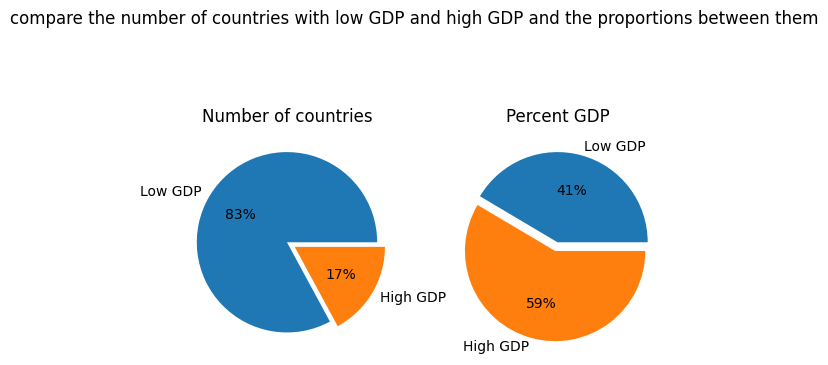

In [38]:
average_gdp = df.groupby('Country', as_index=False)['GDP'].mean().sort_values(by='GDP')
pd.options.display.float_format = '{:,.2f}'.format
average_gdp['type'] = average_gdp.GDP >= 10000
type_gdp = average_gdp.groupby('type').agg({'GDP':['count', 'sum']})

fig, [ax0, ax1] = plt.subplots(1, 2)
ax0.pie(type_gdp[('GDP', 'count')], labels=['Low GDP', 'High GDP'], explode=[0, 0.1], autopct='%0.0f%%')
ax0.set_title('Number of countries')

ax1.pie(type_gdp[('GDP',   'sum')], labels=['Low GDP', 'High GDP'], explode=[0, 0.1], autopct='%0.0f%%')
ax1.set_title('Percent GDP')

plt.suptitle('compare the number of countries with low GDP and high GDP and the proportions between them')
plt.show()

**Comment:**
- Most of countries in the world have too low GPD in this duration, are under 10000.
- Viet Nam has equal or higher than world average GDP but still be low.
- From second plot in this part, only 17% of countries in the world have high GDP but account for 59% of the world's total GDP.

### BMI

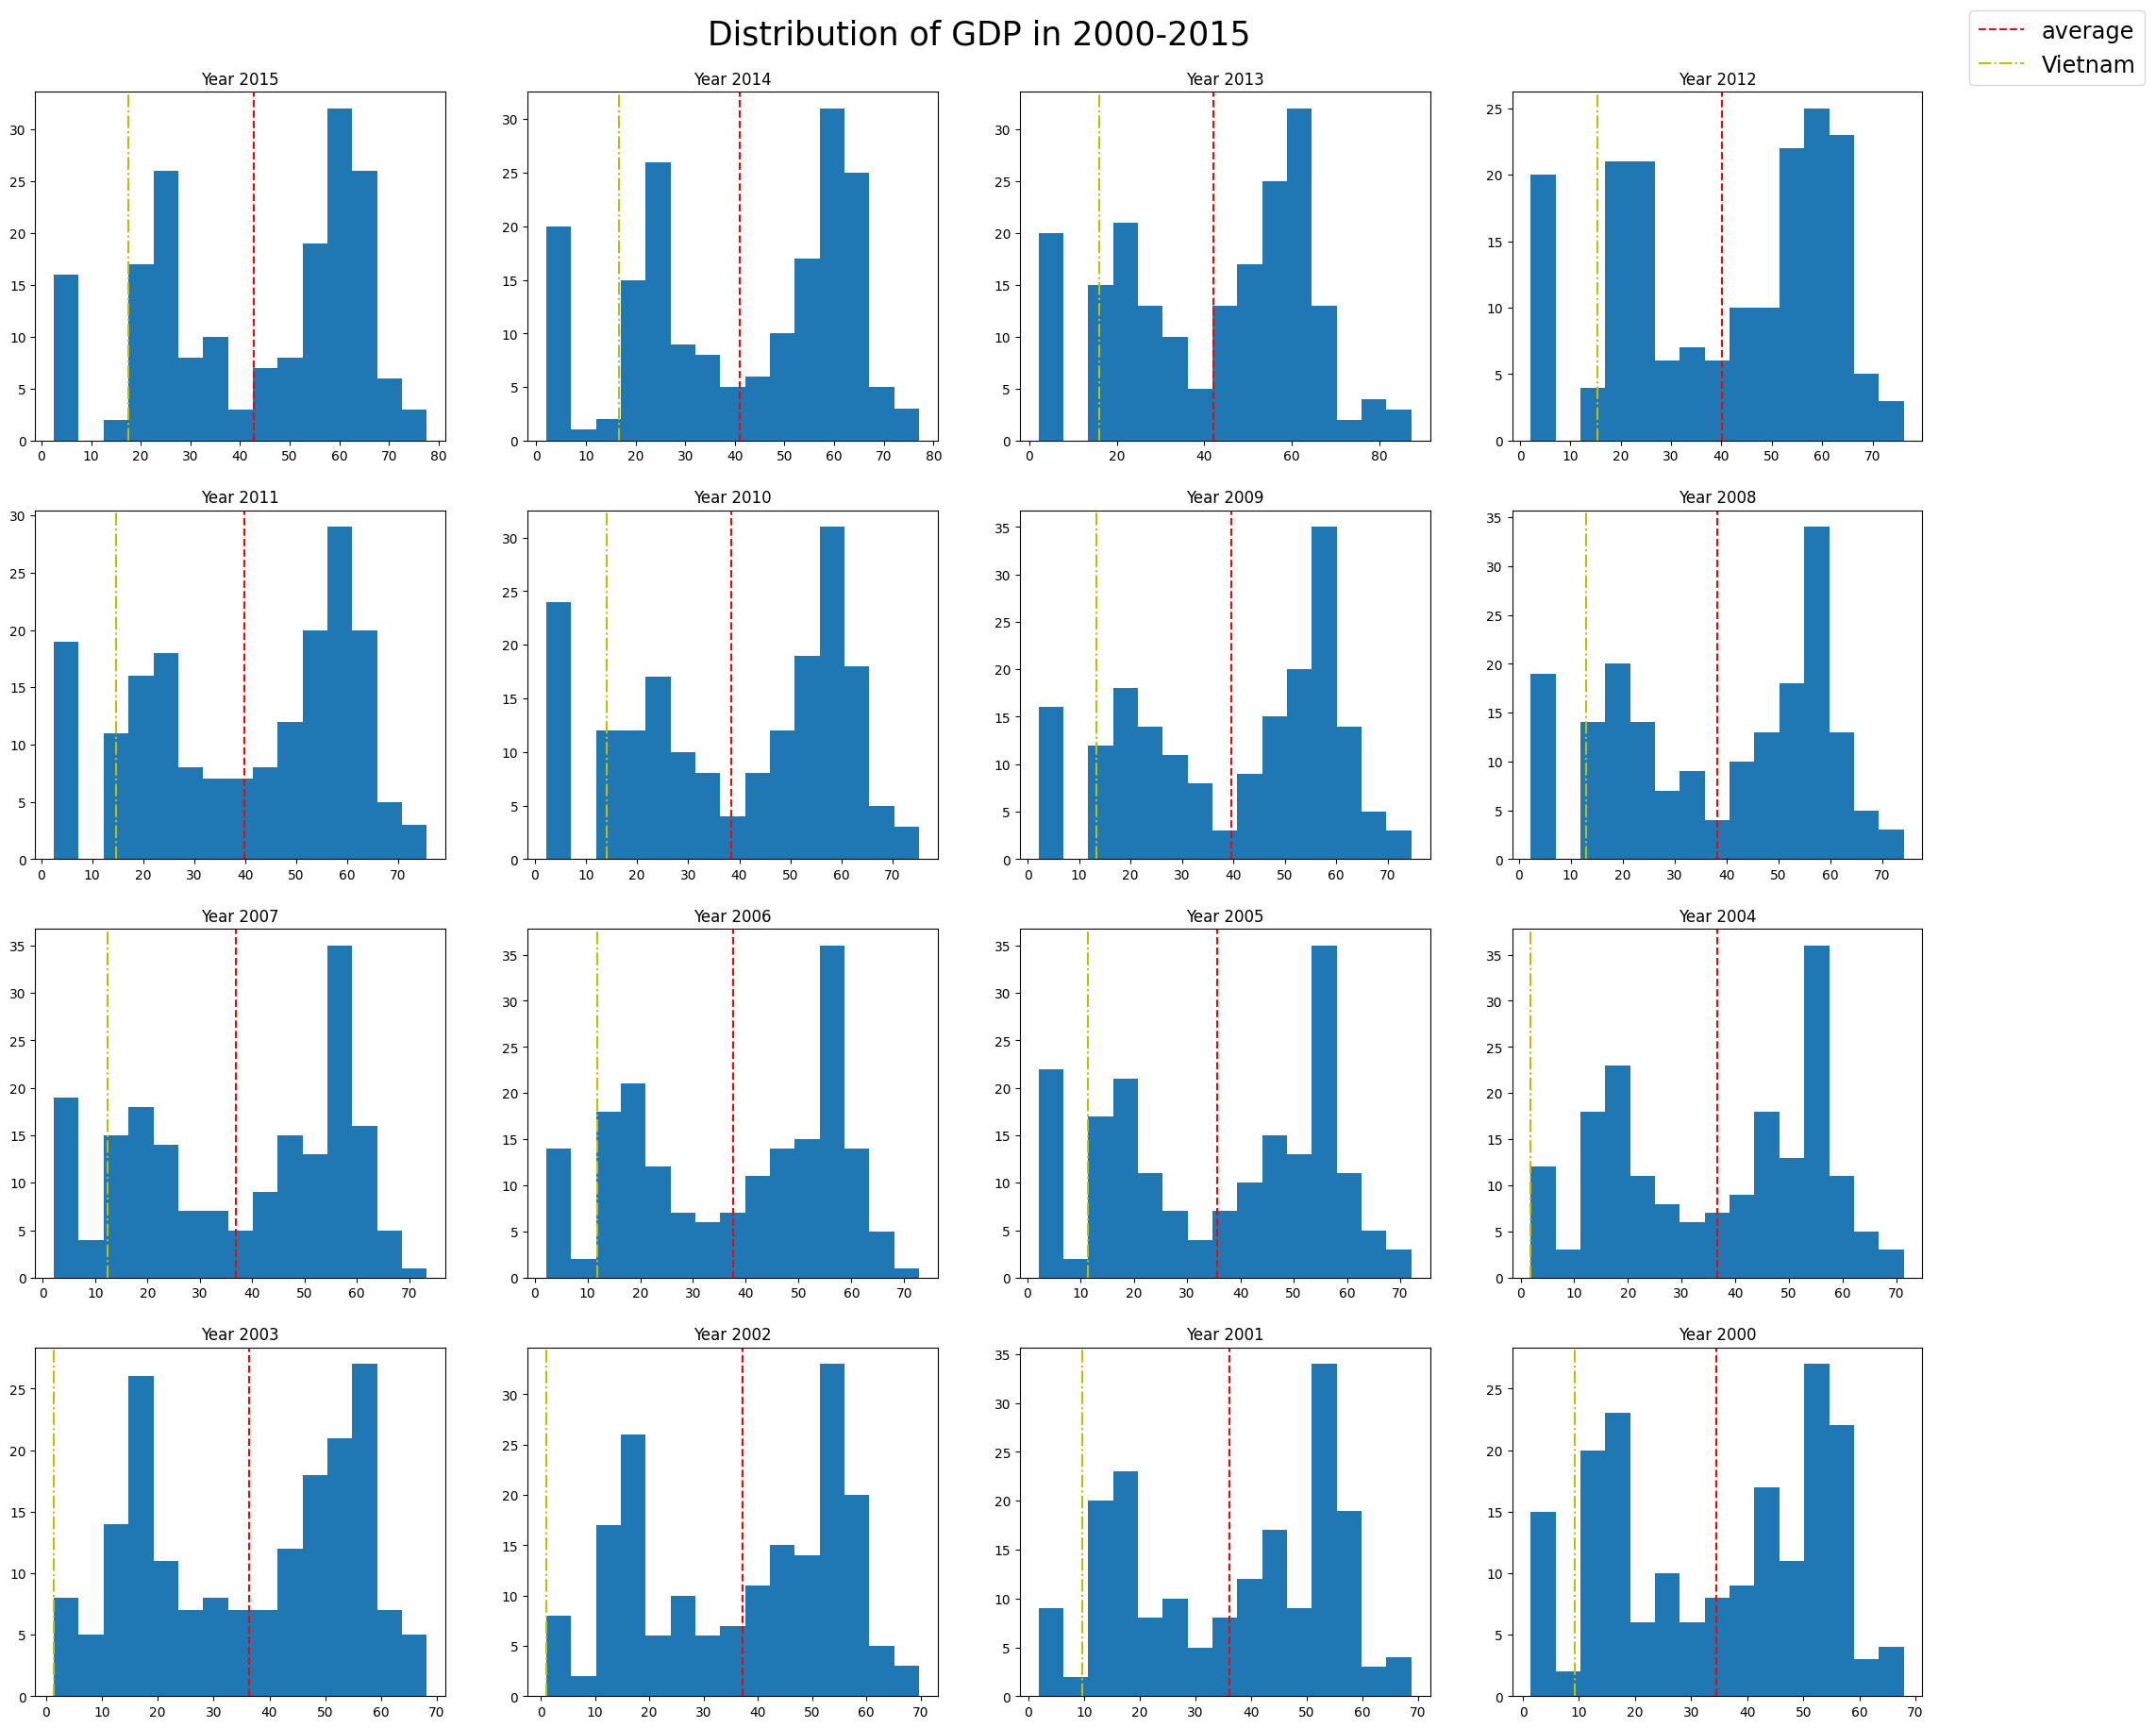

In [39]:
fig, axes = plt.subplots(4, 4, figsize=(25, 20))

for i in range(len(years)):
    bmi_year = df.loc[df.Year == years[i], ['Country', 'BMI']]
    ax = axes[i // 4][i - 4*(i // 4)]
    ax.hist(bmi_year['BMI'], bins=15)
    ax.axvline(bmi_year['BMI'].mean(), c='r', linestyle='--', label='average')
    ax.axvline(bmi_year.loc[df.Country == 'Viet Nam', 'BMI'].values[0], c='y', linestyle='-.', label='Vietnam')
    ax.set_title(f'Year {years[i]}')

fig.suptitle('Distribution of GDP in 2000-2015', horizontalalignment='center', verticalalignment='center', fontsize = 25)
handles, labels = axes[0, 0].get_legend_handles_labels()
fig.legend(handles, labels, fontsize='xx-large')

plt.subplots_adjust(top=0.95, bottom=0.1, left=0.1, right=0.9, hspace=0.2)
plt.show();

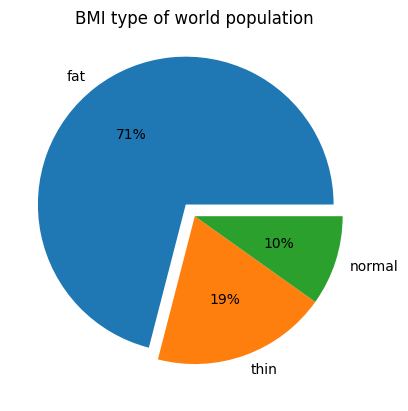

In [40]:
average_bmi = df.groupby('Country', as_index=False)['BMI'].mean()
average_bmi['type'] = average_bmi['BMI'].copy()

average_bmi.loc[average_bmi.BMI < 18.5, 'type'] = 'thin'
average_bmi.loc[(average_bmi.BMI >= 18.5) & (average_bmi.BMI < 25), 'type'] = 'normal'
average_bmi.loc[average_bmi.BMI >= 25, 'type'] = 'fat'

type_bmi = average_bmi.type.value_counts()
plt.pie(type_bmi, labels=type_bmi.index.tolist(), explode=[0.1, 0, 0], autopct='%0.0f%%')
plt.title('BMI type of world population')
plt.show()

**Comment:**
- World BMI is from over 10 to over 70
- There are a lot of outliers that are smaller than 10, which means that there are a lots countries have too bad BMI indicators
- The distribution of MBI look like combination of 2 normal distributions, one is around 20-30 and the other is around 50-60. This mean that there is a large distance BMI between 2 groups of the world
- Another useful information that most of countries is fat according their BMI, there are 71% countries of the world is fat BMI
***&rarr; Fat BMI could be one of the strongest reason affect to life expectancy directly***

## Multivariate analysis

In [41]:
#Fix columns names formatting errors
df_life = df.copy()
columns_name_fixed = []

for column in df.columns:
    if column == ' thinness  1-19 years':
        column = 'Thinness 1-19 years'
    else:
        column = column.strip(' ').replace("  ", " ")
        column = column[:1].upper() + column[1:]
        
    columns_name_fixed.append(column)

df_life.columns = columns_name_fixed
df_life.head(5)

Country  Year      Status  Life expectancy  Adult Mortality  \
0  Afghanistan  2015  Developing            65.00           263.00   
1  Afghanistan  2014  Developing            59.90           271.00   
2  Afghanistan  2013  Developing            59.90           268.00   
3  Afghanistan  2012  Developing            59.50           272.00   
4  Afghanistan  2011  Developing            59.20           275.00   

   Infant deaths  Alcohol  Percentage expenditure  Hepatitis B  Measles   BMI  \
0             62     0.01                   71.28        65.00     1154 19.10   
1             64     0.01                   73.52        62.00      492 18.60   
2             66     0.01                   73.22        64.00      430 18.10   
3             69     0.01                   78.18        67.00     2787 17.60   
4             71     0.01                    7.10        68.00     3013 17.20   

   Under-five deaths  Polio  Total expenditure  Diphtheria  HIV/AIDS    GDP  \
0                 83   6.00               8.16       65.00      0.10 584.26   
1                 86  58.00               8.18       62.00      0.10 612.70   
2                 89  62.00               8.13       64.00      0.10 631.74   
3                 93  67.00               8.52       67.00      0.10 669.96   
4                 97  68.00               7.87       68.00      0.10  63.54   

     Population  Thinness 1-19 years  Thinness 5-9 years  \
0 33,736,494.00                17.20               17.30   
1    327,582.00                17.50               17.50   
2 31,731,688.00                17.70               17.70   
3  3,696,958.00                17.90               18.00   
4  2,978,599.00                18.20               18.20   

   Income composition of resources  Schooling  
0                             0.48      10.10  
1                             0.48      10.00  
2                             0.47       9.90  
3                             0.46       9.80  
4                             0.45       9.50

### The relationships of the life expectancy with the other independent variables

In [42]:
# Function to plot scatter plots with regression lines
def plot1(df_life, features, title='Features', columns=2, x_lim=None):
    rows = math.ceil(len(features) / 2)
    fig, ax = plt.subplots(rows, columns, sharey=True, figsize=(14, 14))
    
    for i, feature in enumerate(features):
        ax = plt.subplot(rows, columns, i + 1)
        sns.regplot(data=df_life, x=feature, y='Life expectancy', scatter_kws={'s': 60, 'edgecolor': 'k'},
                    line_kws={'color': 'red'}, ax=ax)
        ax.set_title('Life Expectancy vs ' + feature)
        
    fig.suptitle('{} x Life Expectancy'.format(title), fontsize=25, x=0.56)
    fig.tight_layout(rect=[0.05, 0.03, 1, 1])
    plt.show()

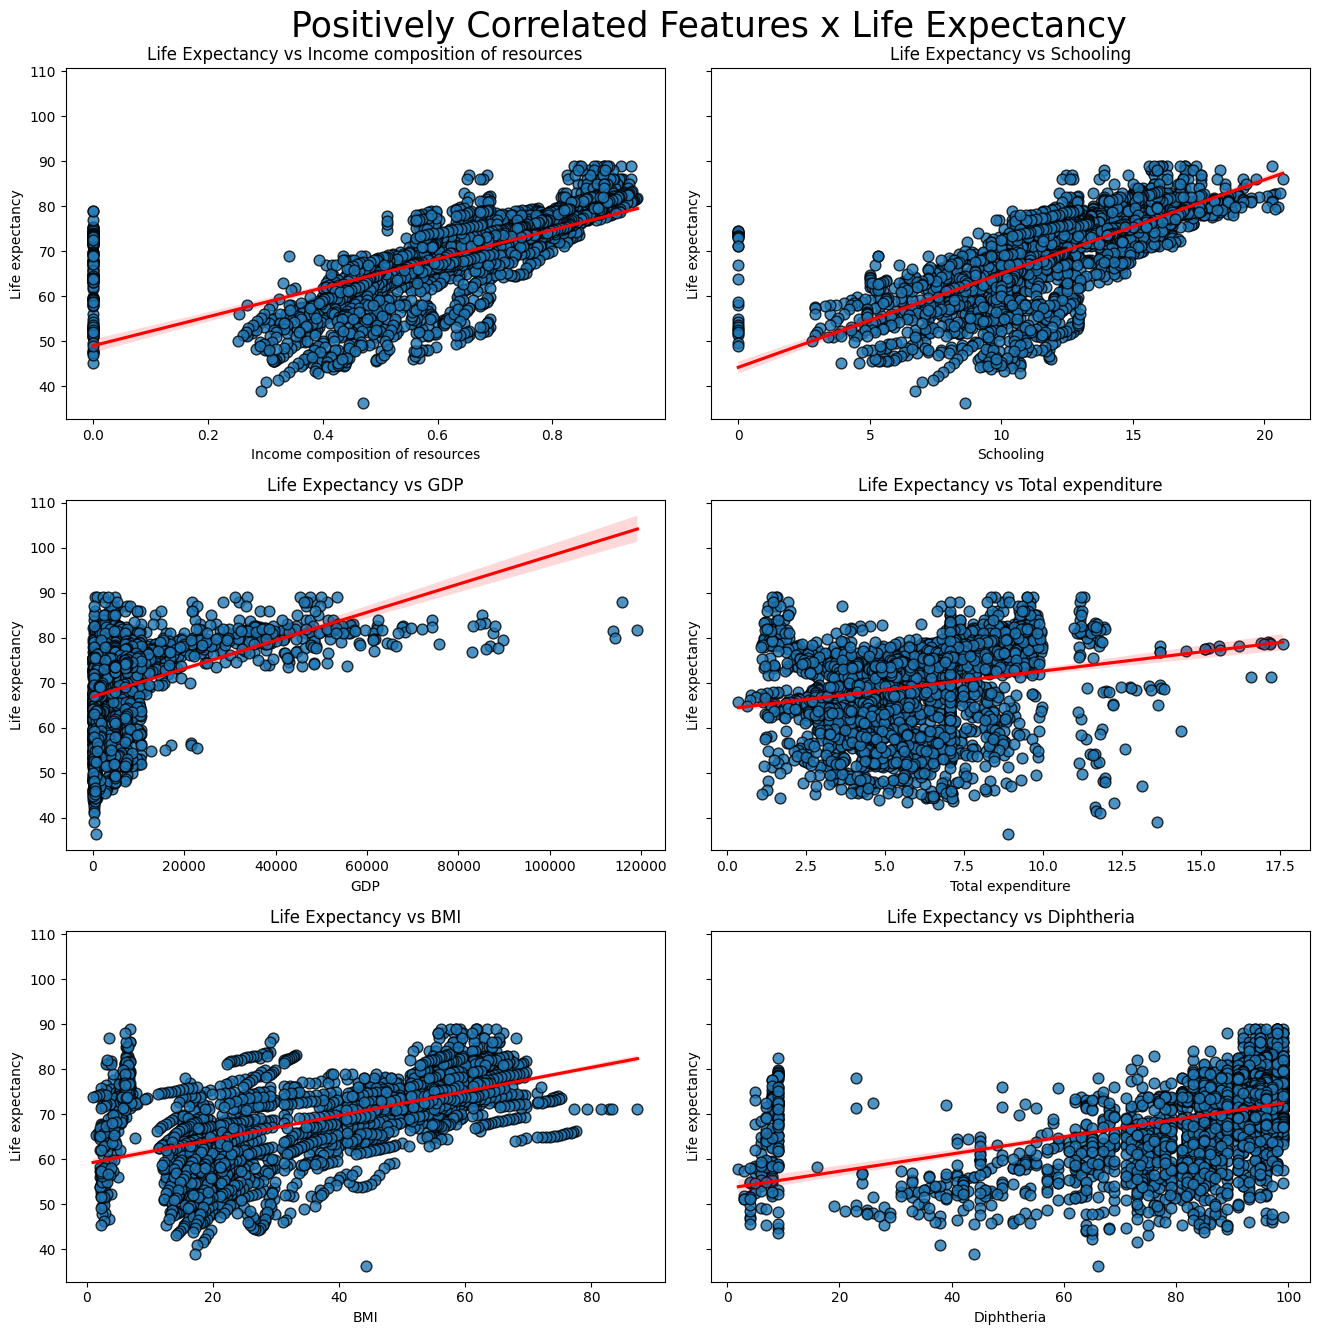

In [43]:
# List of positively correlated features with life expectancy
pos_correlated_features = ['Income composition of resources', 'Schooling', 'GDP', 'Total expenditure', 
                           'BMI', 'Diphtheria']

# Plot scatter plots with regression lines for positively correlated features
plot1(df_life, pos_correlated_features, title='Positively Correlated Features')

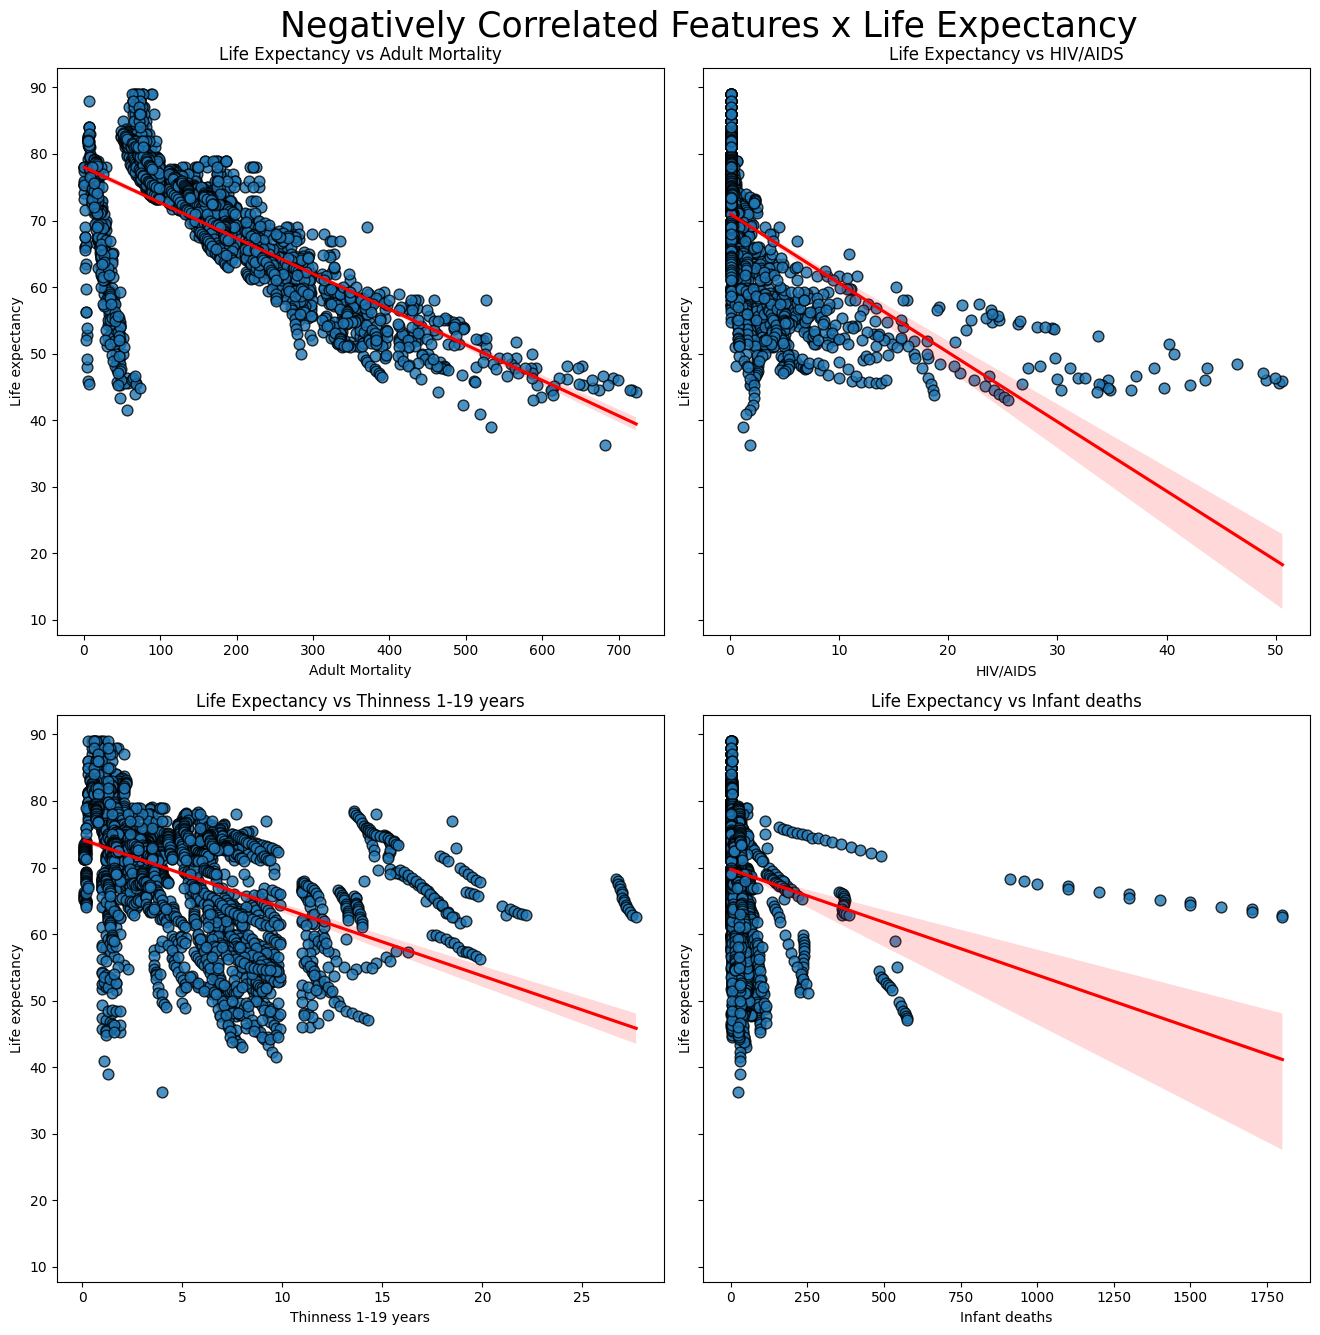

In [44]:
# List of negatively correlated features with life expectancy
neg_correlated_features = ['Adult Mortality', 'HIV/AIDS', 
                            'Thinness 1-19 years', 'Infant deaths']

# Plot scatter plots with regression lines for nagatively correlated features
plot1(df_life, neg_correlated_features, title='Negatively Correlated Features')

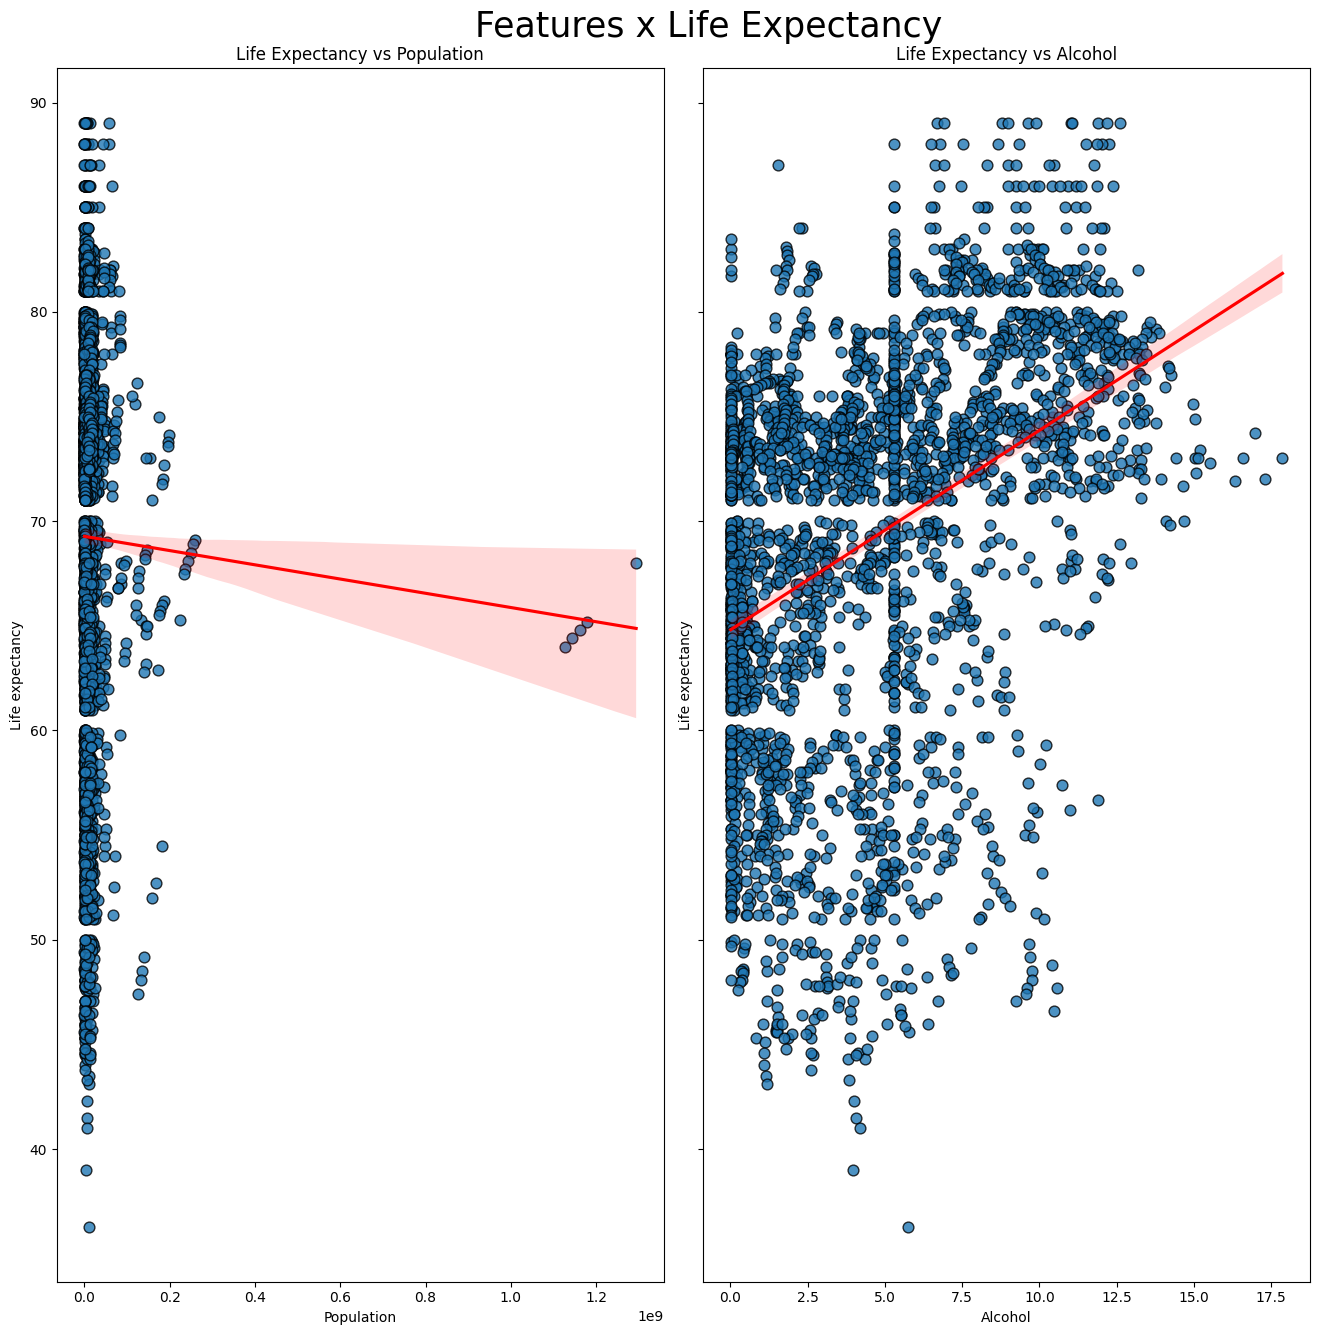

In [45]:
#Check other correlations
features = ['Population', 'Alcohol']
plot1(df_life, features)

In [46]:
# Function to plot scatter plots with regression lines but usse log scale 
def plot2(df_life, features, title='Features', columns=2, x_lim=None):
    rows = math.ceil(len(features) / 2)
    fig, ax = plt.subplots(rows, columns, sharey=True, figsize=(14, 14))
    
    for i, feature in enumerate(features):
        ax = plt.subplot(rows, columns, i + 1)
        log_feature = np.log1p(df_life[feature])
        sns.regplot(data=df_life, x=log_feature, y='Life expectancy', scatter_kws={'s': 60, 'edgecolor': 'k'},
                    line_kws={'color': 'red'}, ax=ax)
        ax.set_title('Life Expectancy vs log(' + feature + ')')
        
    fig.suptitle('{} x Life Expectancy'.format(title), fontsize=25, x=0.56)
    fig.tight_layout(rect=[0.05, 0.03, 1, 1])
    plt.show()

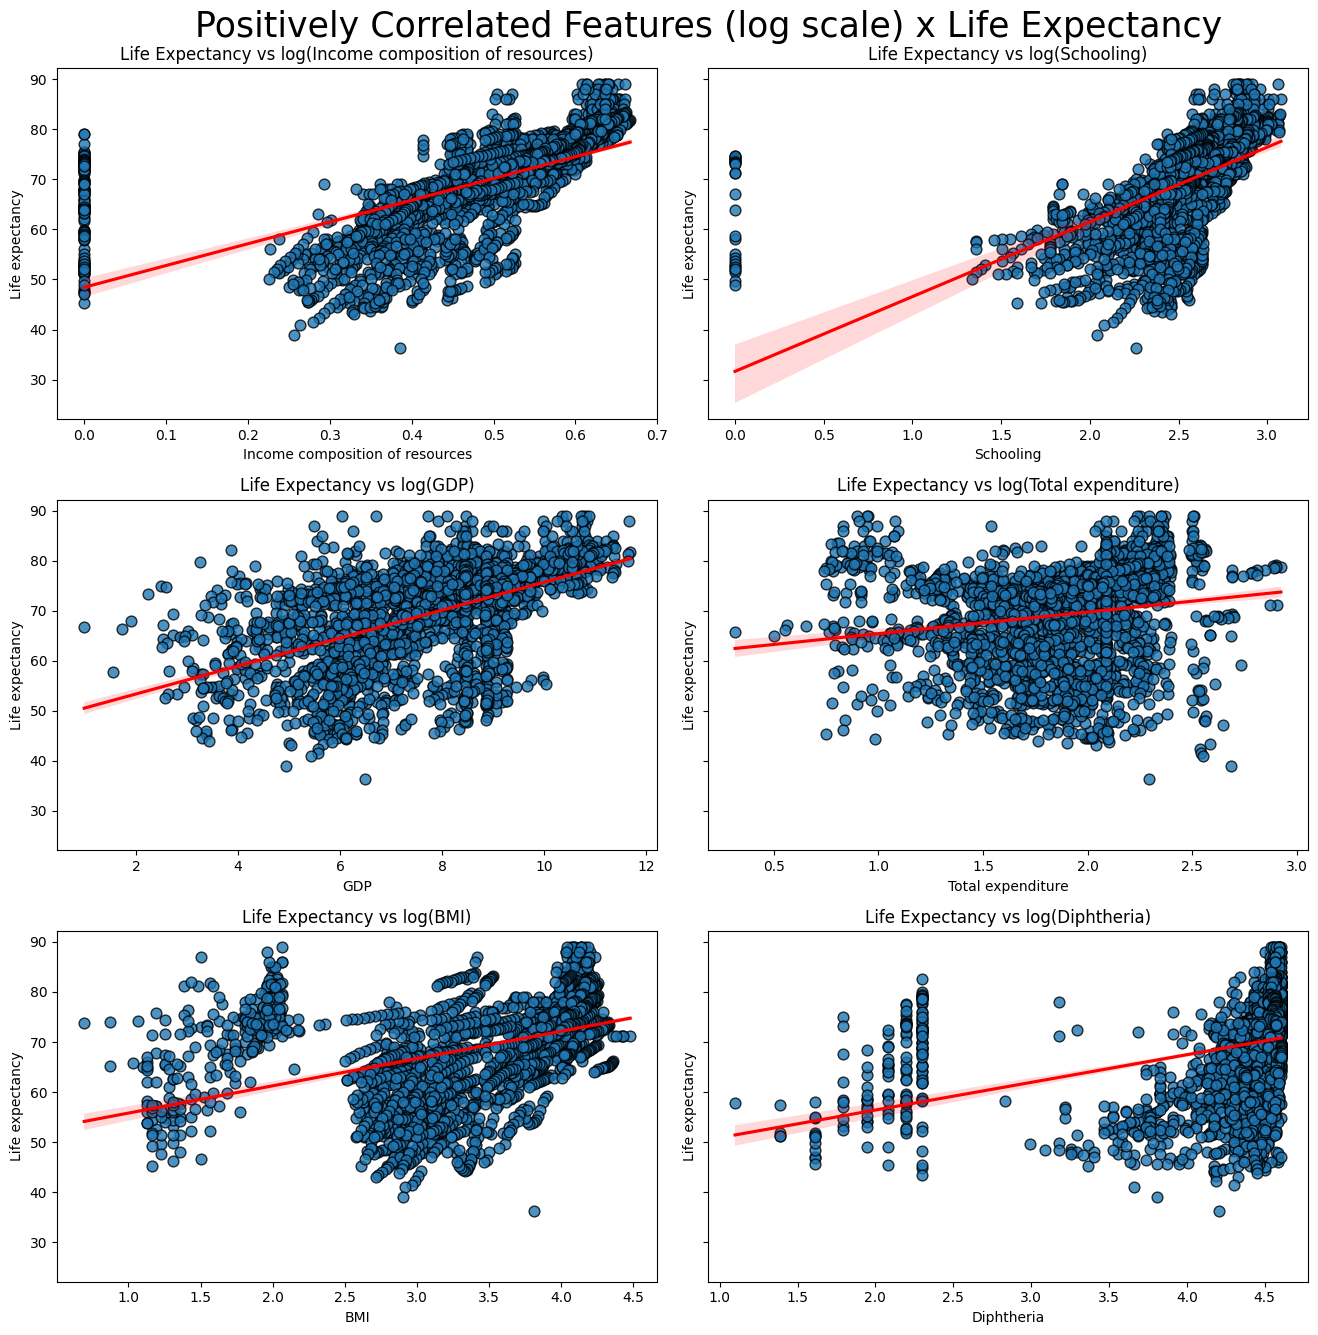

In [47]:
# List of positively correlated features with life expectancy
positively_correlated_features = ['Income composition of resources', 'Schooling', 'GDP', 'Total expenditure', 
                           'BMI', 'Diphtheria']

# Plot scatter plots with regression lines for the logarithm of positively correlated features
plot2(df_life, positively_correlated_features, title='Positively Correlated Features (log scale)')

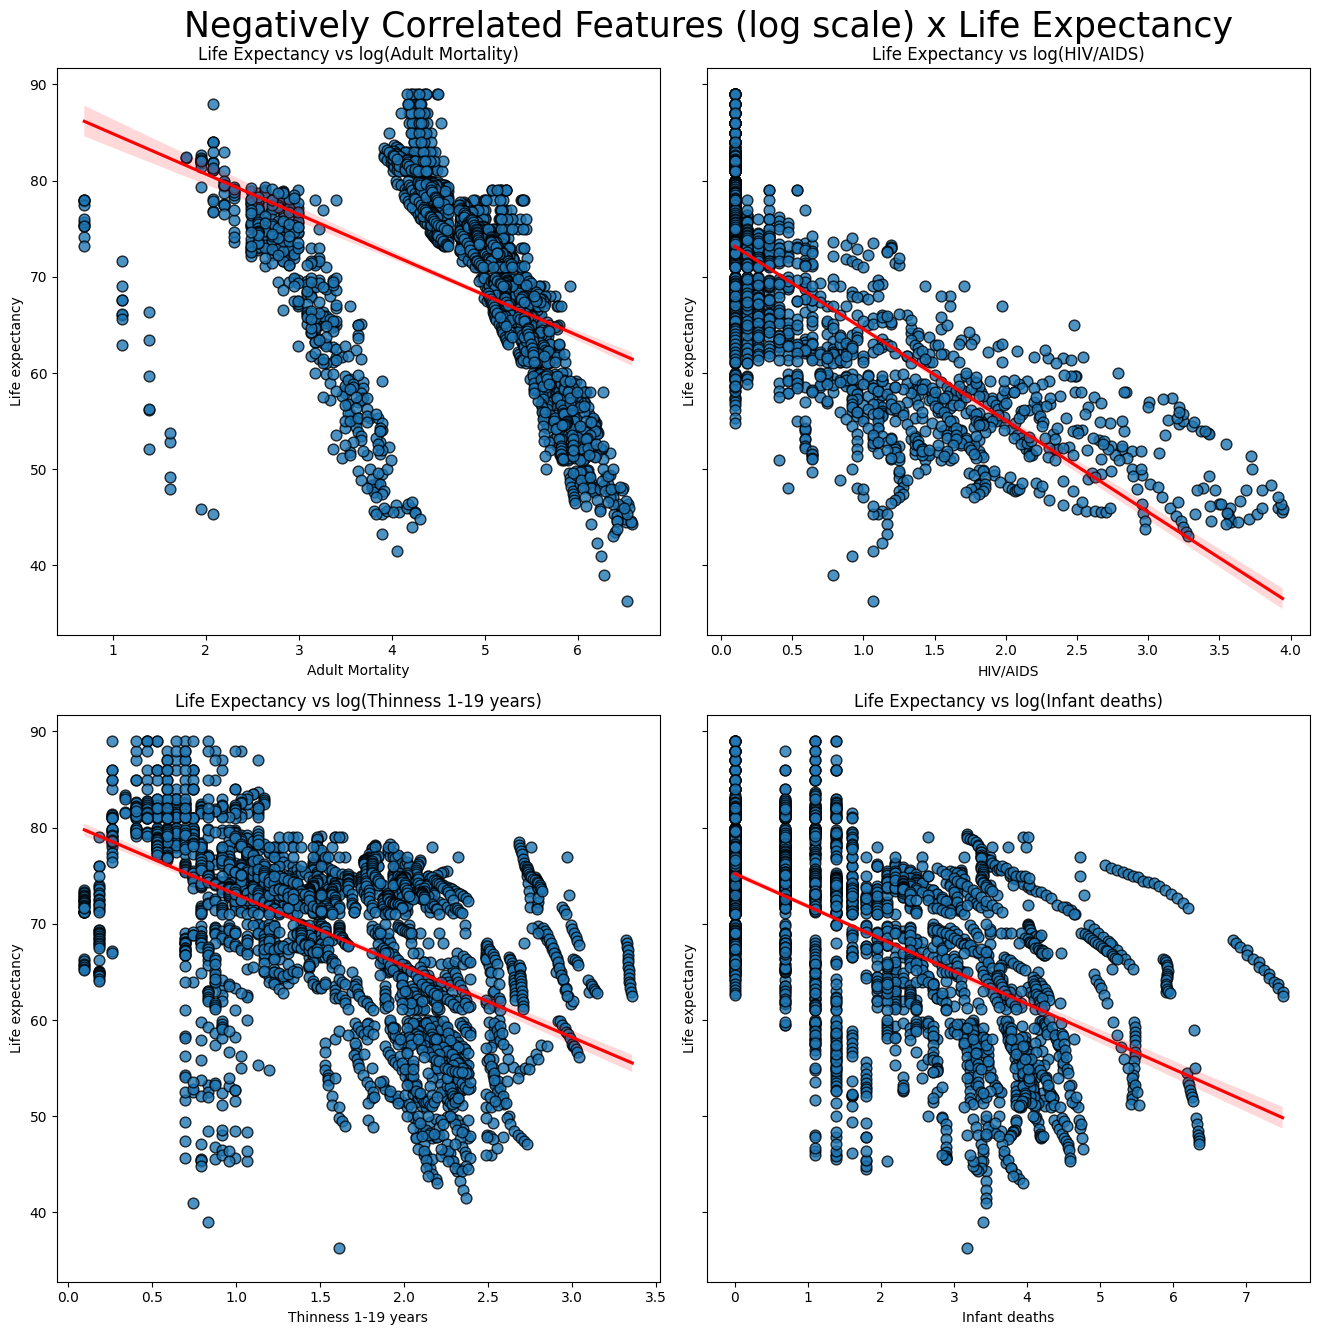

In [48]:
# List of negatively correlated features with life expectancy
neg_correlated_features = ['Adult Mortality', 'HIV/AIDS', 
                            'Thinness 1-19 years', 'Infant deaths']

# Plot scatter plots with regression lines for the logarithm of negatively correlated features
plot2(df_life, neg_correlated_features, title='Negatively Correlated Features (log scale)')

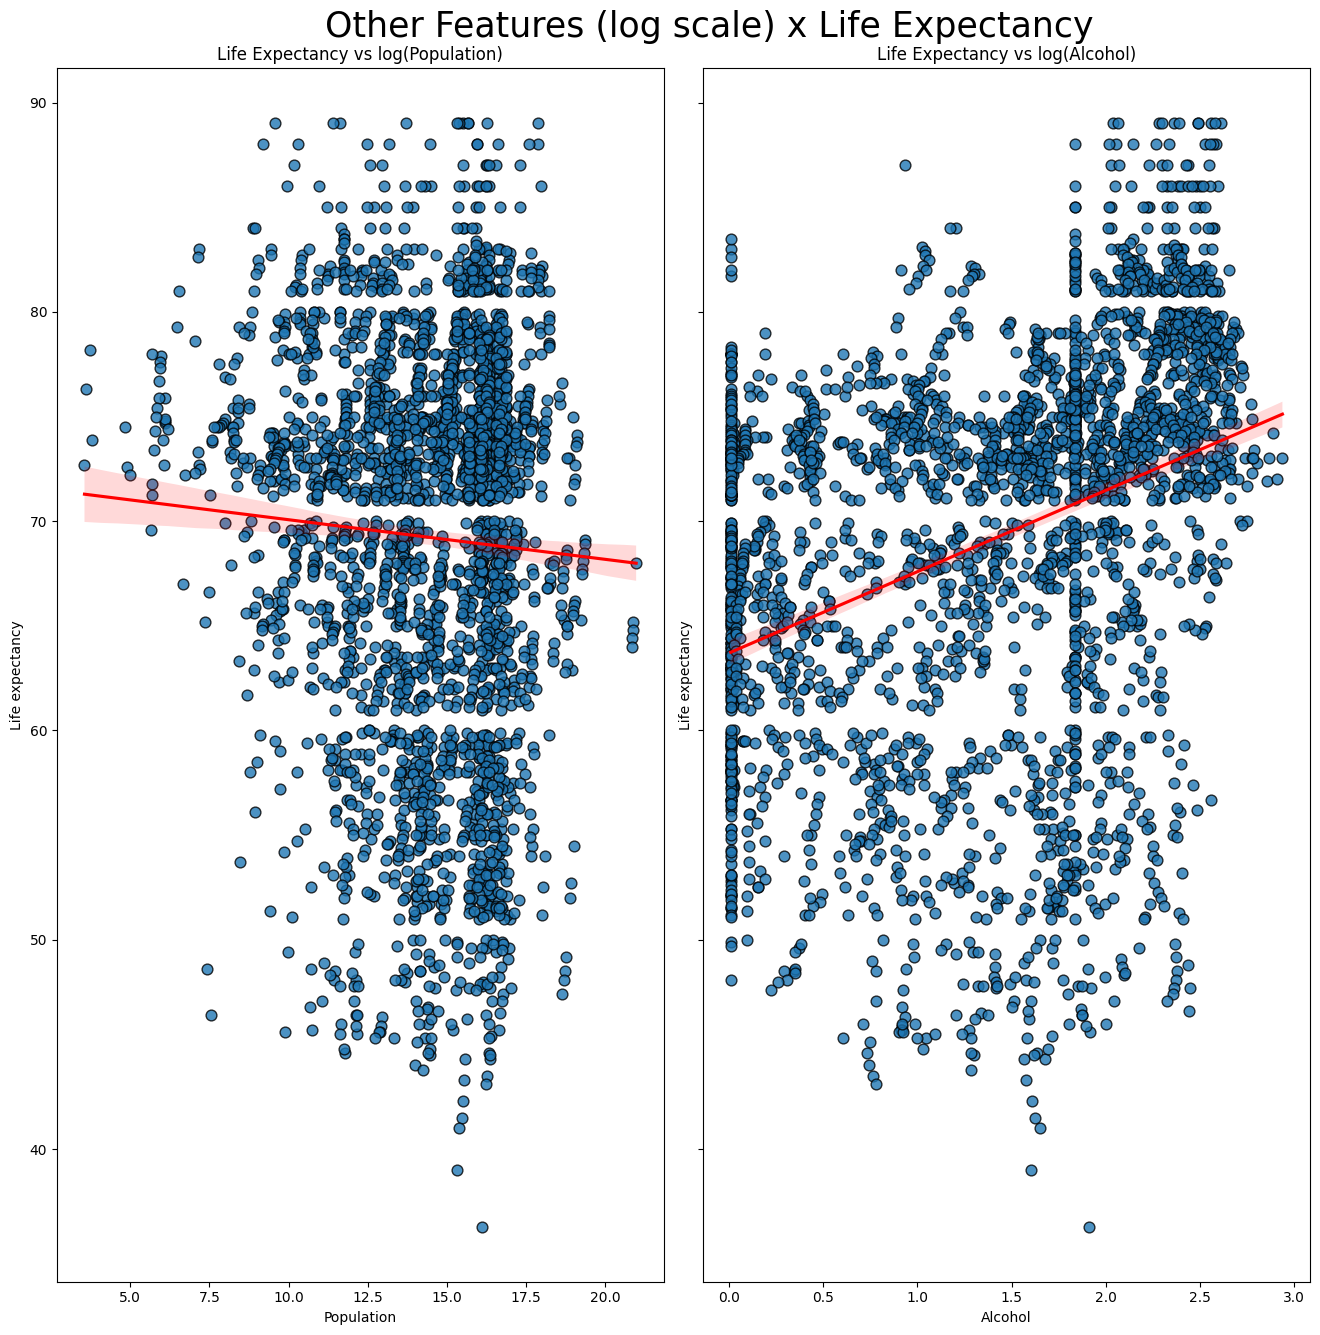

In [49]:
#Check other correlations
features = ['Population', 'Alcohol']
plot2(df_life, features, title='Other Features (log scale)')

### The relationships of the life expectancy point with the other independent variables group by country status

In [50]:
#Function to plot scatter plots
def plot_scatterplot(df_life, features, title = 'Features', columns = 2, x_lim=None):
    
    rows = math.ceil(len(features)/2)

    fig, ax = plt.subplots(rows, columns, sharey = True, figsize = (14,14))
    
    for i, feature in enumerate(features):
        ax = plt.subplot(rows, columns, i+1)
        sns.scatterplot(data = df_life,
                        x = feature,
                        y = 'Life expectancy',
                        hue = 'Status',
                        palette=['#669bbc', '#c1121f'],
                        ax = ax)
        if (i == 0):
            ax.legend()
        else:
            ax.legend("")
        
    fig.legend(*ax.get_legend_handles_labels(), 
               loc='lower center', 
               bbox_to_anchor=(1.04, 0.5),
               fontsize='small')
    fig.suptitle('{} x Life Expectancy'.format(title), 
                 fontsize = 25, 
                 x = 0.56);

    fig.tight_layout(rect=[0.05, 0.03, 1, 1])

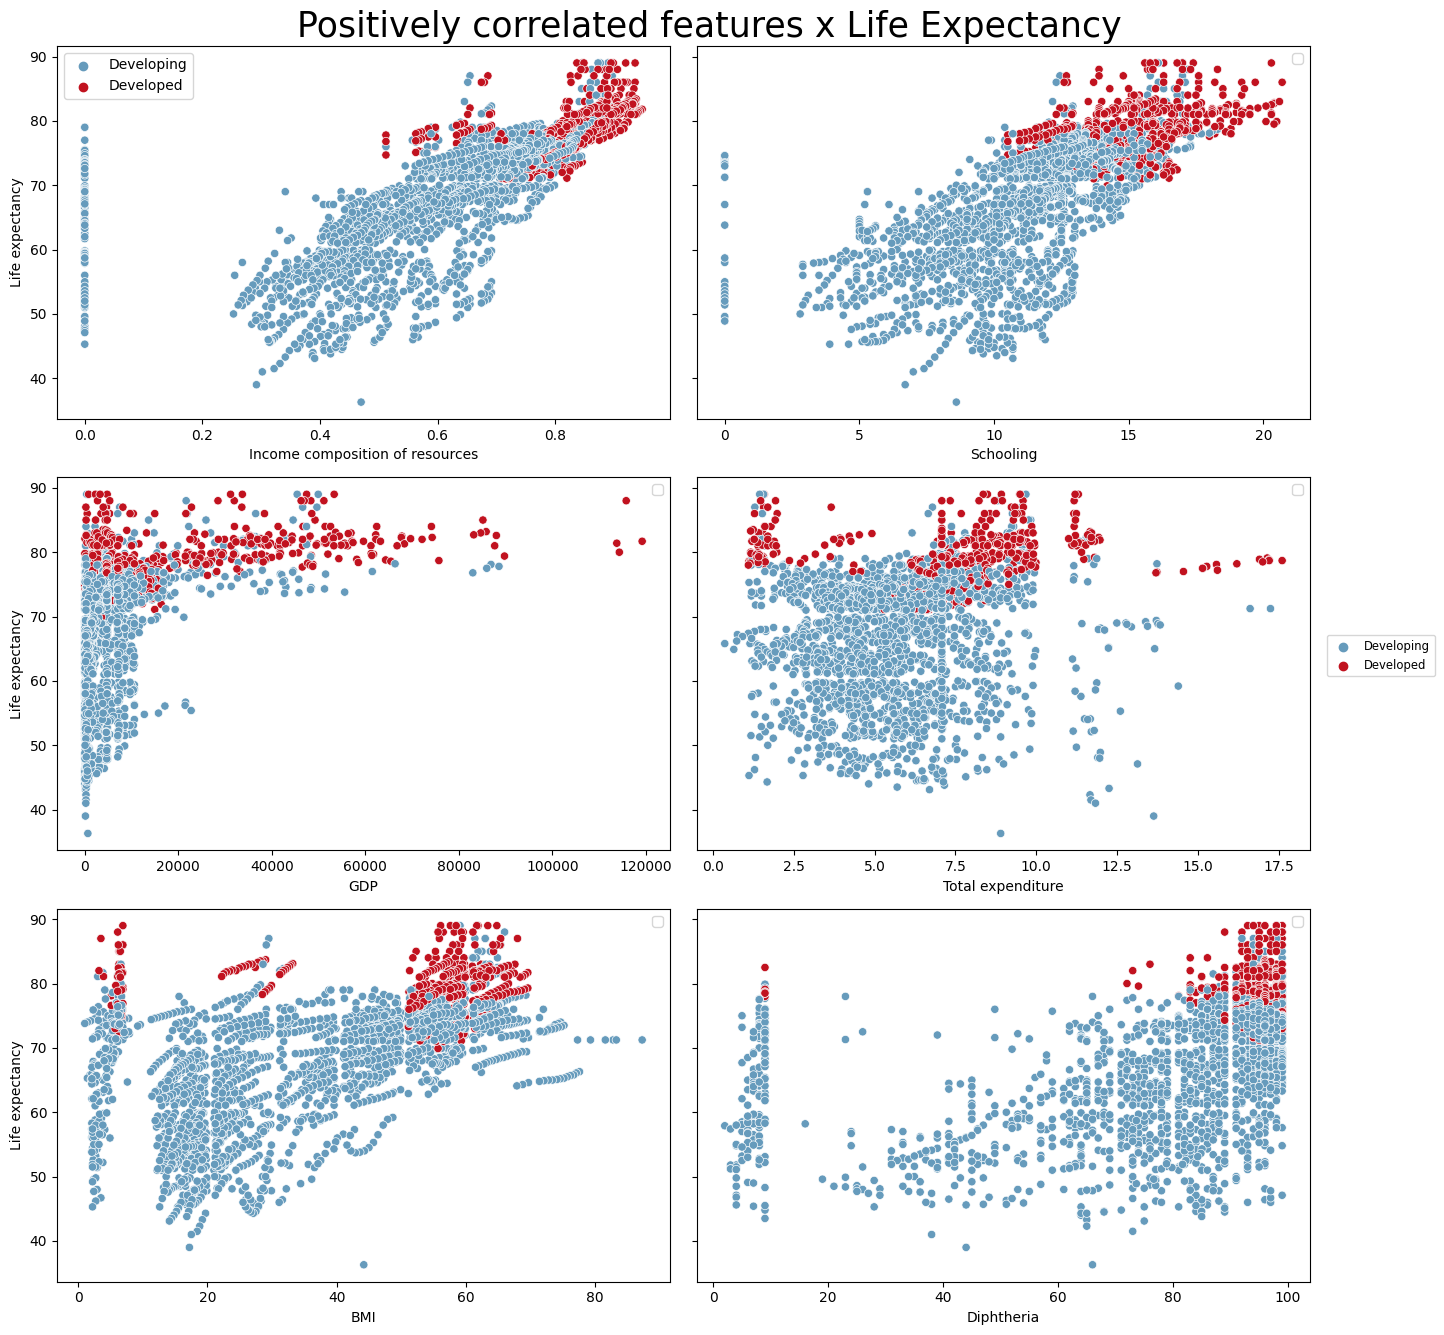

In [51]:
#Plot Life Expectancy x positively correlated features
pos_correlated_features = ['Income composition of resources', 'Schooling', 
                           'GDP', 'Total expenditure', 
                           'BMI', 'Diphtheria']

title = 'Positively correlated features'

plot_scatterplot(df_life, pos_correlated_features, title)

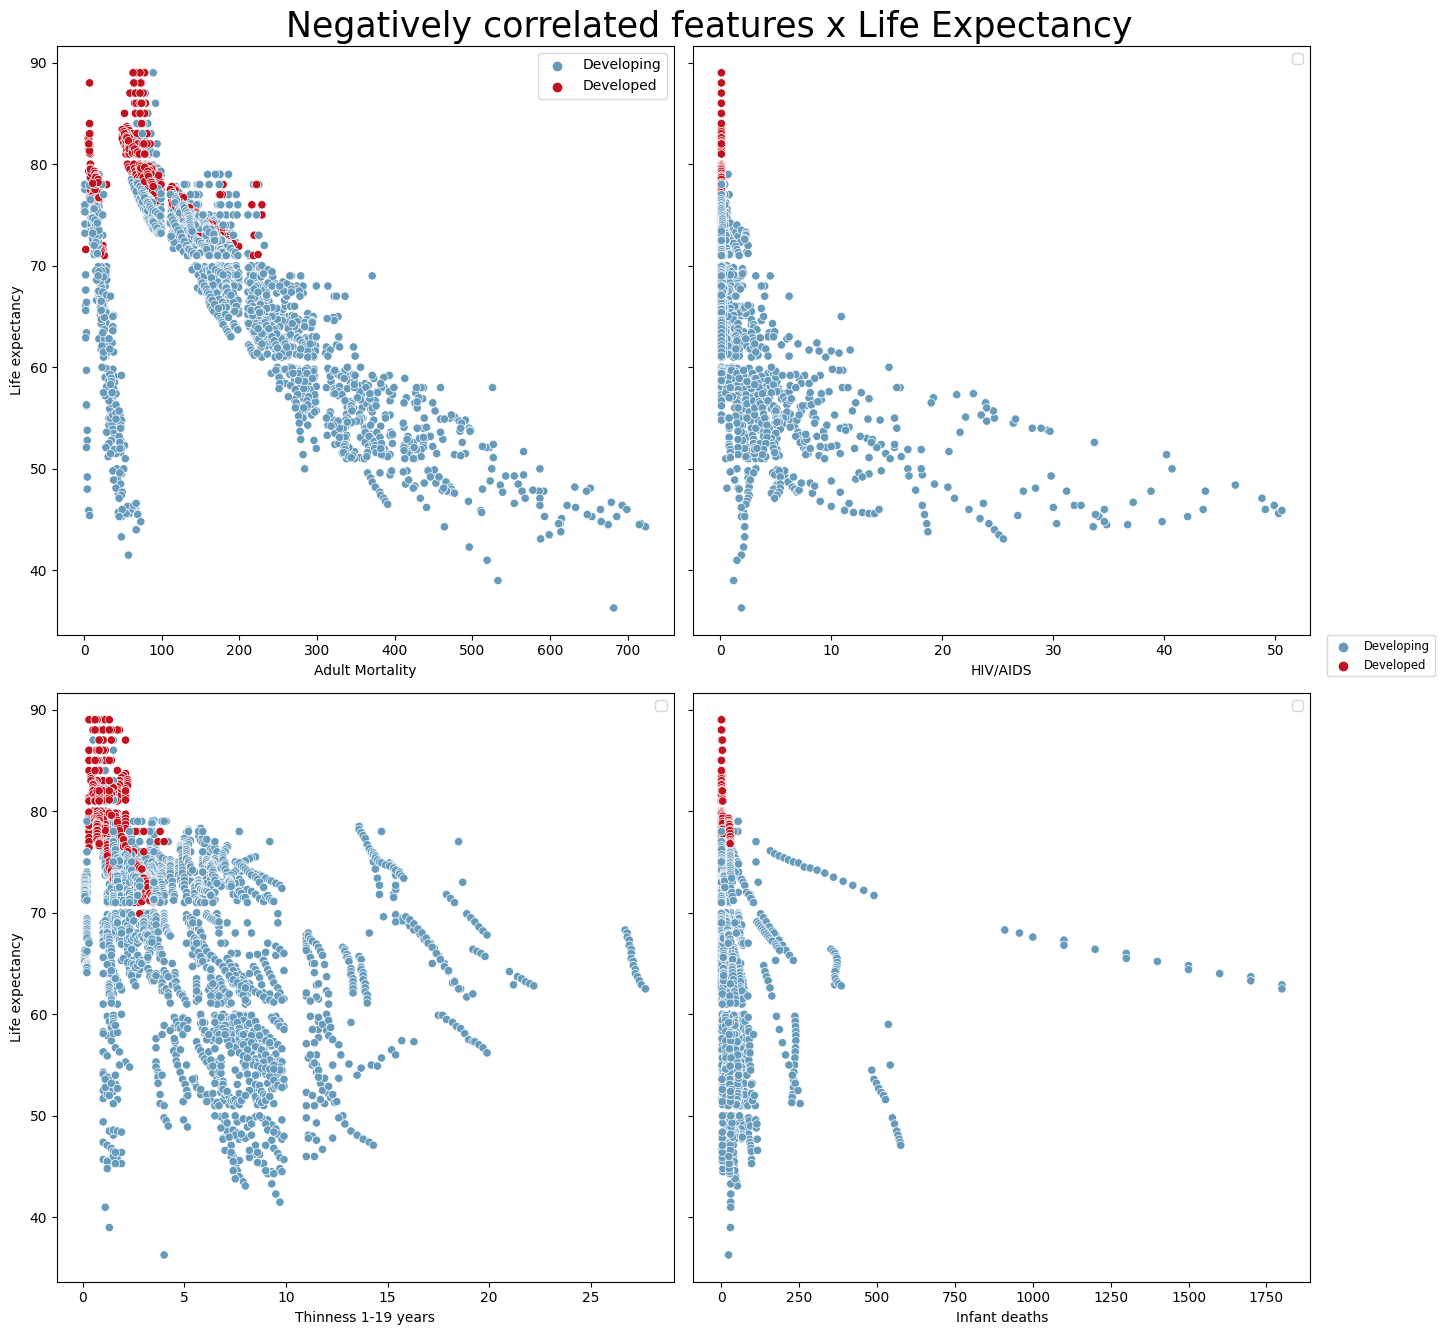

In [52]:
#Plot Life Expectancy x negatively correlated features
neg_correlated_features = ['Adult Mortality', 'HIV/AIDS', 
                           'Thinness 1-19 years', 'Infant deaths']

title = 'Negatively correlated features'

plot_scatterplot(df_life, neg_correlated_features, title)

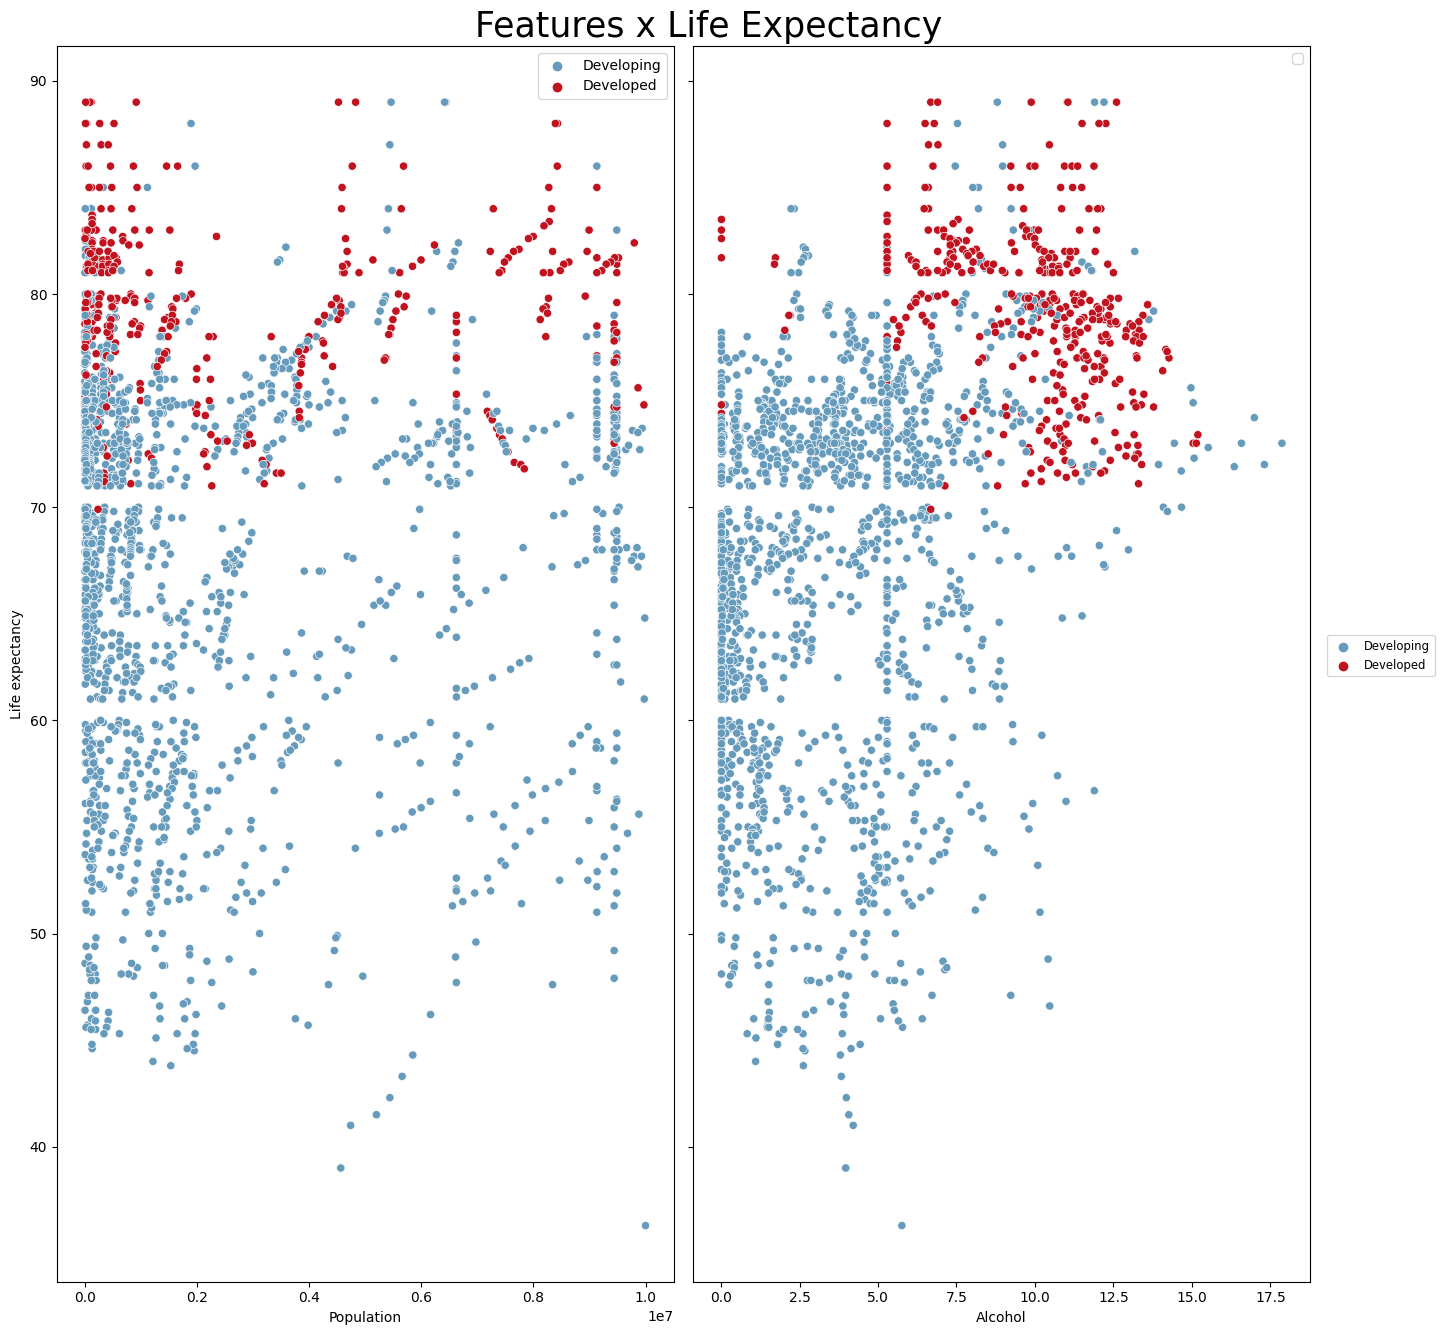

In [53]:
#Check other correlations
df_temp = df_life.loc[df_life['Population'] <= 1*1e7, :] 
features = ['Population', 'Alcohol']
plot_scatterplot(df_temp, features)

#### Conclusions:
- It seems that the absolute number of a country's population does not have a direct relationship with life expectancy. Perhaps a more interesting variable would be population density, which can provide more clues about the country's social and geographical conditions.
- Another interesting point is that countries with the highest alcohol consumption also have the highest life expectancies. However, this seems to be the classic case for using the maxim 'Correlation does not imply causation'. The life expectancy of someone who owns a Ferrari is possibly higher than that of the rest of the population, but that does not mean that buying a Ferrari will increase their life expectancy. The same applies to alcohol. One hypothesis is that in developed countries, the population's average has better financial conditions, allowing for greater consumption of luxury goods such as alcohol.

## Time series analysis (Optional)

In [54]:
df_time = pd.read_csv('LE_cleaned_data.csv')
df_time['Year'] = pd.to_datetime(df_time['Year'], format='%Y')
df_time.sample(10)

Country       Year      Status  Life expectancy  \
981                    Georgia 2012-01-01  Developing            74.20   
555                      Chile 2004-01-01  Developing            78.00   
847          Equatorial Guinea 2002-01-01  Developing            53.50   
1732                Montenegro 2015-01-01  Developing            76.10   
164                    Bahamas 2011-01-01  Developing            75.00   
2406              South Africa 2002-01-01  Developing            54.90   
519   Central African Republic 2008-01-01  Developing            47.60   
2891                     Yemen 2014-01-01  Developing            65.40   
2918                    Zambia 2003-01-01  Developing            46.40   
2205                     Samoa 2010-01-01  Developing            72.60   

      Adult Mortality  infant deaths  Alcohol  percentage expenditure  \
981             13.00              1     7.71                  158.26   
555             97.00              2     6.32                   78.79   
847            334.00              3     6.01                  234.79   
1732            16.00              0     5.29                    0.00   
164            162.00              0     9.34                    0.00   
2406           459.00             54     7.04                  346.53   
519            477.00             17     1.52                   67.34   
2891           228.00             37     0.01                    0.00   
2918            64.00             39     2.33                   65.79   
2205           144.00              0     3.01                  434.79   

      Hepatitis B  Measles   BMI  under-five deaths  Polio  Total expenditure  \
981         92.00       31 53.60                  1  93.00               8.57   
555         77.99        0 56.80                  2  94.00               6.93   
847         76.52       24 19.10                  4  44.00               2.50   
1732        82.00        0 61.80                  0  89.00               7.08   
164         95.00        0 62.00                  0  97.00               7.63   
2406        72.00     1043 41.60                 79   7.00               8.90   
519         83.64       12 19.40                 25  46.00               4.30   
2891        73.00      815  4.40                 47  67.00               5.64   
2918        74.10      881 17.60                 62  85.00               8.18   
2205        57.00        8 72.50                  0  57.00               5.70   

      Diphtheria  HIV/AIDS       GDP    Population  thinness 1-19 years  \
981        92.00      0.10  4,142.87      3,825.00                 2.60   
555        93.00      0.10    621.83 15,973,778.00                 0.90   
847        36.00      2.90  2,711.17     66,647.00                 1.40   
1732       89.00      0.10  6,461.19    622,159.00                 1.80   
164        98.00      0.10  9,685.91 11,295,739.67                 2.50   
2406        7.00     26.60  2,518.40 45,855,482.88                14.50   
519        45.00      8.30    456.86  4,345,386.00                 9.30   
2891       73.00      0.10 10,015.57 21,062,964.45                13.70   
2918       83.00     18.20    429.16 11,421,984.00                 7.30   
2205       62.00      0.10  3,453.49     18,625.00                 0.20   

      thinness 5-9 years  Income composition of resources  Schooling  
981                 2.80                             0.75      13.40  
555                 1.00                             0.78      14.30  
847                 1.30                             0.54       8.20  
1732                1.80                             0.80      15.10  
164                 2.50                             0.79      12.60  
2406               17.10                             0.62      12.90  
519                 9.20                             0.34       6.30  
2891               13.50                             0.50       9.00  
2918                7.20                       

### Are Life Expectancy stationary?

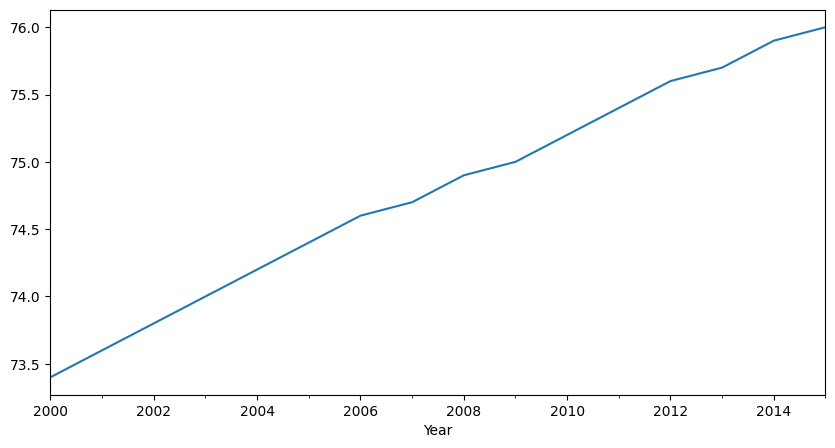

In [55]:
time = df_time.pivot(index='Year', columns='Country', values='Life expectancy')
vn = time['Viet Nam']
vn.plot(kind='line', figsize=(10, 5));

Hypothesis Testing by using p-value. If p-value is less than $alpha = 0.05$, we can reject the null hypothesis that the time series is non-stationary.

In [56]:
test = vn.reset_index()
df_station = adfuller(test['Viet Nam'], autolag='AIC')
print('P-value: ', df_station[1])

P-value:  0.518011406063334


We calculated p-value = 0.5 > 0.05, then we reject H1 and conclude that the time series is non-stationary (accept H0).

In [57]:
time = time.T

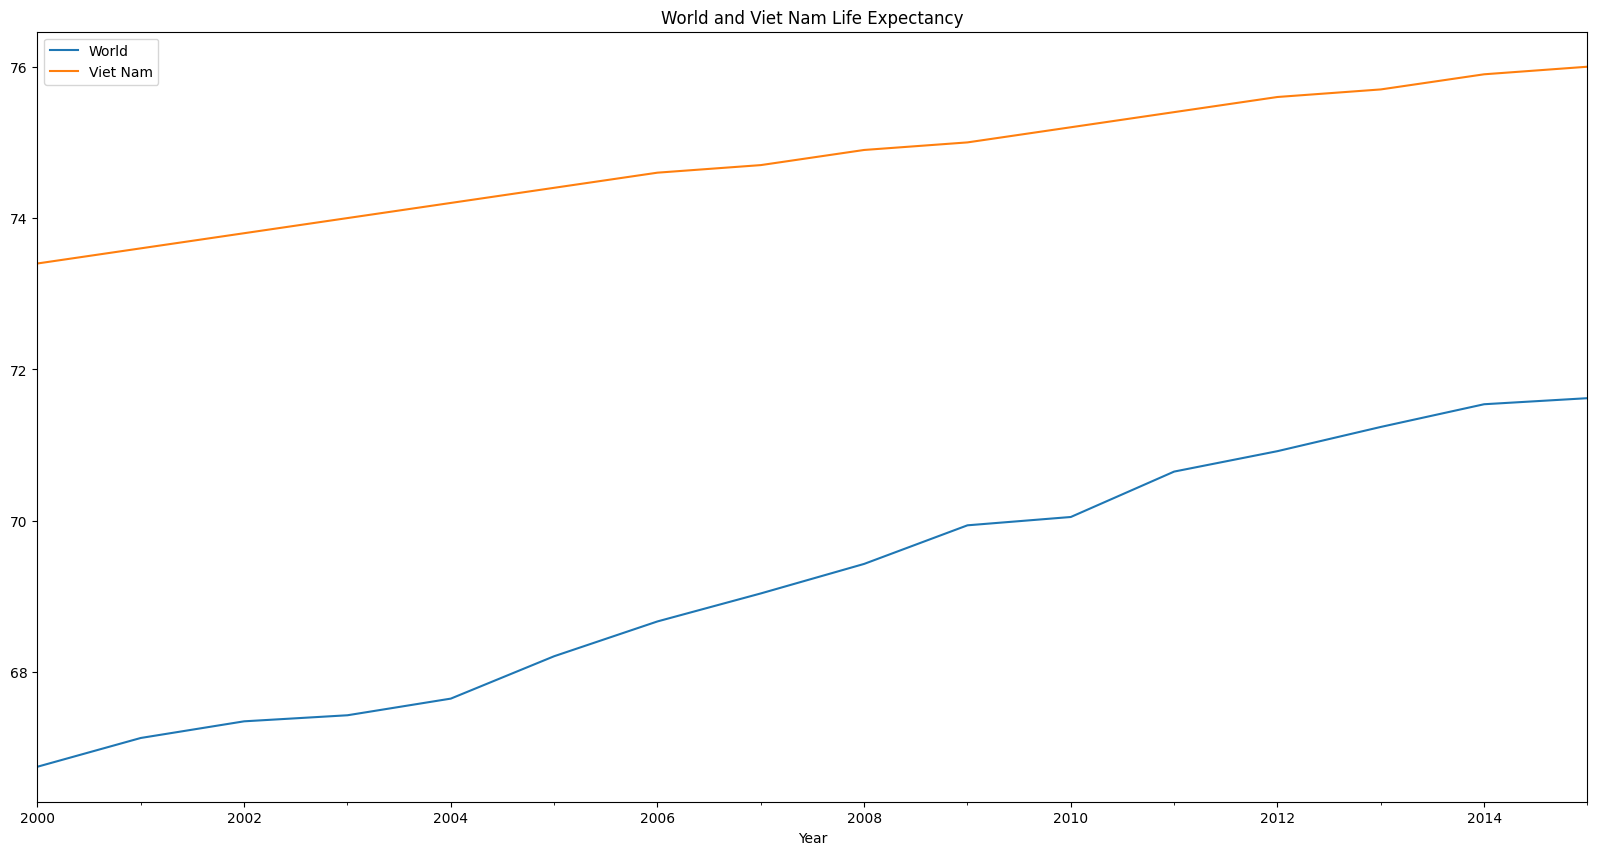

In [58]:
world = time.describe().round(2)
world = world.loc[world.index == 'mean']
world = world.T.rename({'mean': 'World'}, axis=1)
merged = world.reset_index().merge(vn.reset_index(),left_on = 'Year', right_on = 'Year', how = 'inner')
merged.set_index('Year', inplace=True)
merged.plot(kind='line', figsize=(20, 10), title='World and Viet Nam Life Expectancy');

Conclusion:
- Life Expectancy tends to increase over time.
- This time-series data is non-stationary.

### Cyclical Analysis

Is the time-series data cyclical? Let us explore first with autocorrelation by ACF and PACF visualization.

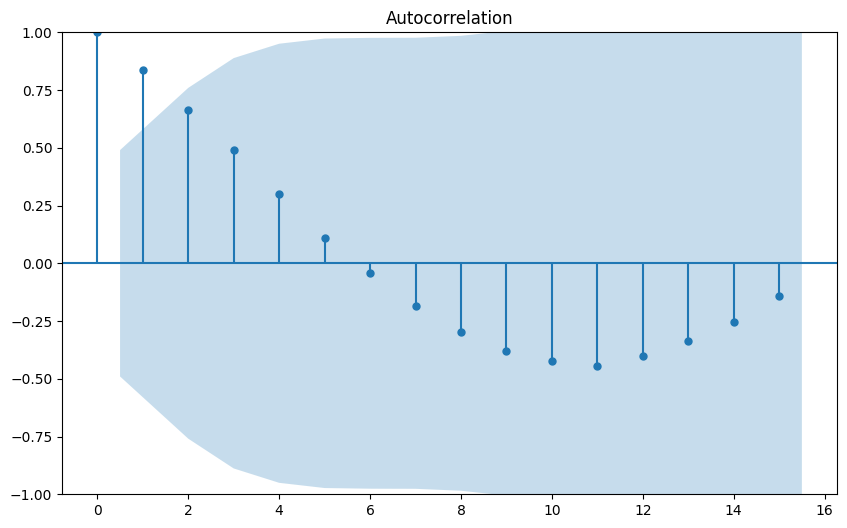

In [59]:
acf_cal = world.reset_index().rename(columns={'World':'Life Expectancy'})
mpl.rc("figure", figsize=(10, 6))
plot_acf(acf_cal["Life Expectancy"], lags = 15);

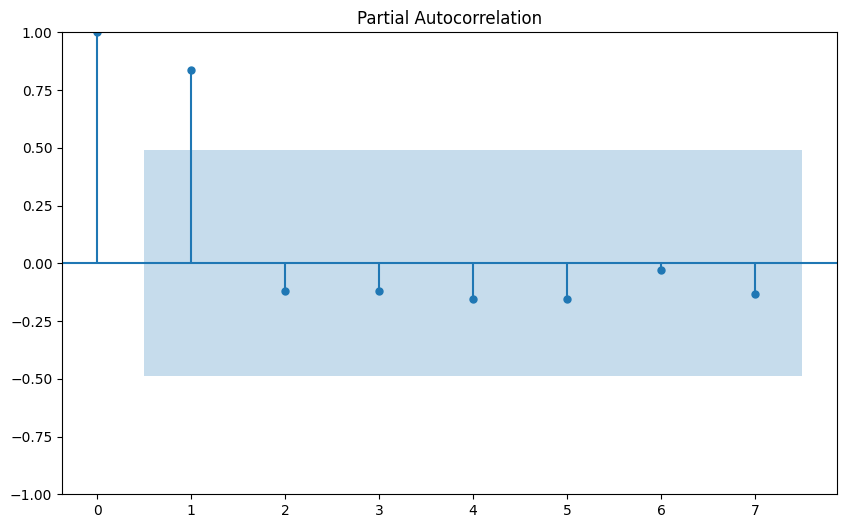

In [60]:
plot_pacf(acf_cal["Life Expectancy"], lags = 7, method='ywm');

Durbin-Watson hypothesis test for autocorrelation, which can be a value belonged to these ranges:
- $0 < val < 1$: the data has positive autocorrelation.
- $1< val <3$: the data has no autocorrelation.
- $3 < val < 4$: the data has negative autocorrelation.

In [61]:
gfg = durbin_watson(acf_cal["Life Expectancy"])
gfg

2.562214970855357e-05

Conclusion:
- Life expectancy has positive autocorrelation.
- Life expectancy within this dataset is not cyclical.

### Detrending

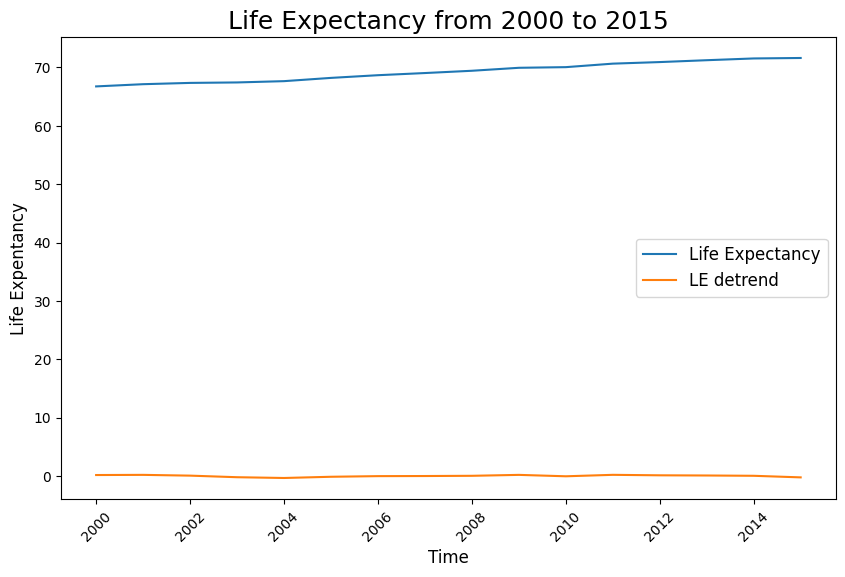

In [62]:
temp = world.reset_index().rename(columns={'World':'Life Expectancy'})

detr = signal.detrend(temp['Life Expectancy'])
detr = pd.DataFrame({'LE detrend':detr},index = world.index)

temp.set_index('Year', inplace=True)
plt.figure(figsize=(10, 6))
plt.plot(temp["Life Expectancy"], label=temp.columns[0])
plt.plot(detr, label=detr.columns[0])
plt.xticks(rotation=45)
plt.xlabel("Time", fontsize=12)
plt.ylabel("Life Expentancy", fontsize=12)
plt.legend(fontsize=12)
plt.title("Life Expectancy from 2000 to 2015", fontsize=18)
plt.show()

## Comparation of Life Expectancy between Viet Nam and the World 

### The mean life expectancy of Vietnam with the global average

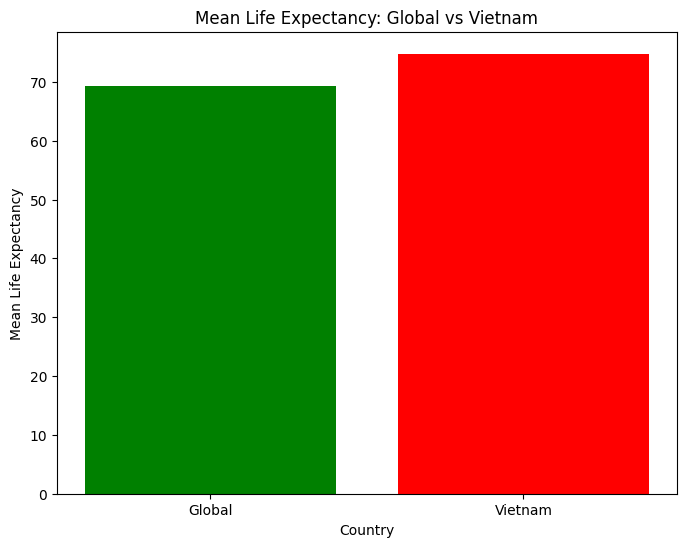

In [63]:
# Calculate mean life expectancy for Vietnam and global
global_mean_life_expectancy = df_life["Life expectancy"].mean()
vietnam_mean_life_expectancy = df_life[df_life["Country"] == "Viet Nam"]["Life expectancy"].mean()

# Create a bar plot with customized colors
plt.figure(figsize=(8, 6))
plt.bar(["Global", "Vietnam"], [global_mean_life_expectancy, vietnam_mean_life_expectancy], color=["green", "red"])
plt.title("Mean Life Expectancy: Global vs Vietnam")
plt.xlabel("Country")
plt.ylabel("Mean Life Expectancy")
plt.show()

### The life expectancy ranking of Vietnam each year 

C:\Users\THANH PHU\AppData\Local\Temp\ipykernel_23404\4220914230.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ranking = df_ranking.append({'Year': year, 'Rank': vietnam_rank}, ignore_index=True)
C:\Users\THANH PHU\AppData\Local\Temp\ipykernel_23404\4220914230.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ranking = df_ranking.append({'Year': year, 'Rank': vietnam_rank}, ignore_index=True)
C:\Users\THANH PHU\AppData\Local\Temp\ipykernel_23404\4220914230.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ranking = df_ranking.append({'Year': year, 'Rank': vietnam_rank}, ignore_index=True)
C:\Users\THANH PHU\AppData\Local\Temp\ipykernel_23404\4220914230.py:14: FutureWarning: The frame.append method is d

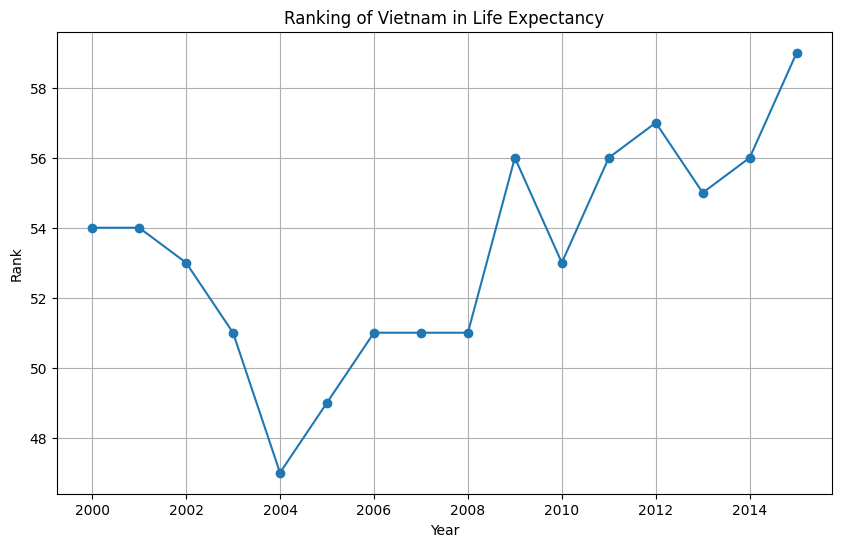

In [64]:
# Filter the data from the year 2000 onwards
df_from_2000 = df_life[df_life['Year'] >= 2000]

# Create an empty DataFrame to store the rankings
df_ranking = pd.DataFrame(columns=['Year', 'Rank'])

# Iterate over each year
for year in df_from_2000['Year'].unique():
    df_year = df_from_2000[df_from_2000['Year'] == year]
    df_year_sorted = df_year.sort_values('Life expectancy', ascending=False)
    df_year_sorted.reset_index(drop=True, inplace=True)
    df_year_sorted.index = df_year_sorted.index + 1
    vietnam_rank = df_year_sorted[df_year_sorted['Country'] == 'Viet Nam'].index[0]
    df_ranking = df_ranking.append({'Year': year, 'Rank': vietnam_rank}, ignore_index=True)

# Plot the ranking of Vietnam over the years
plt.figure(figsize=(10, 6))
plt.plot(df_ranking['Year'], df_ranking['Rank'], marker='o')
plt.title('Ranking of Vietnam in Life Expectancy')
plt.xlabel('Year')
plt.ylabel('Rank')
plt.grid(True)
plt.show()

### Compare the life expectancy of Vietnam with the top 5 countries with the highest life expectancy

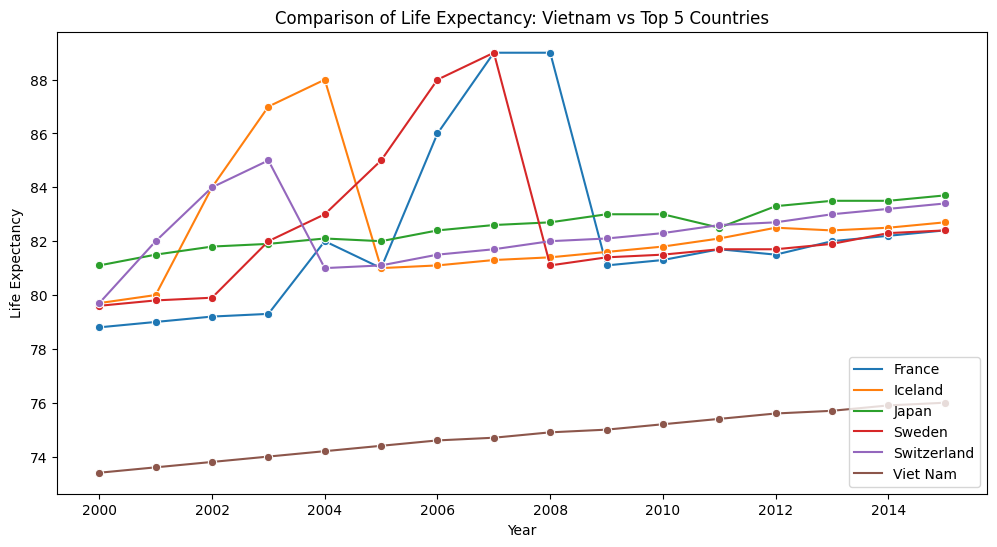

In [65]:
df_avg_life_expectancy = df_life.groupby('Country')['Life expectancy'].mean().reset_index()
df_avg_life_expectancy = df_avg_life_expectancy.sort_values('Life expectancy', ascending=False)
top_5_countries = df_avg_life_expectancy.head(5)['Country'].tolist()
selected_countries = ['Viet Nam'] + top_5_countries
df_comparison = df_life[df_life['Country'].isin(selected_countries)]
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_comparison, x='Year', y='Life expectancy', hue='Country', marker='o')
plt.title('Comparison of Life Expectancy: Vietnam vs Top 5 Countries')
plt.xlabel('Year')
plt.ylabel('Life Expectancy')
plt.legend(loc='lower right')
plt.show()

### The life expectancy of Vietnam and Southeast Asian countries in the most recent 5 years

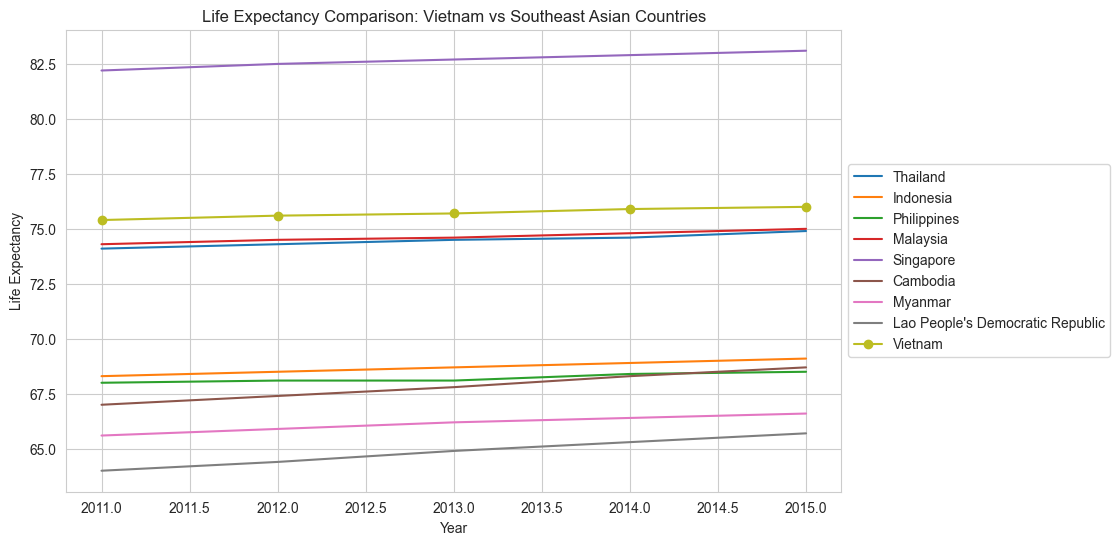

In [85]:
# Filter the data for Southeast Asian countries and the most recent 5 years
southeast_asian_countries = ['Viet Nam', 'Thailand', 'Indonesia', 'Philippines', 'Malaysia', 'Singapore', 'Cambodia', 'Myanmar', "Lao People's Democratic Republic"]
df_southeast_asia = df_life[df_life['Country'].isin(southeast_asian_countries)]
recent_years = df_southeast_asia['Year'].max() - 4
df_recent = df_southeast_asia[df_southeast_asia['Year'] >= recent_years]

# Plot the life expectancy of Vietnam and Southeast Asian countries in the most recent 5 years
plt.figure(figsize=(10, 6))
for country in southeast_asian_countries:
    if country != 'Viet Nam':
        plt.plot(df_recent[df_recent['Country'] == country]['Year'], df_recent[df_recent['Country'] == country]['Life expectancy'], label=country)
plt.plot(df_recent[df_recent['Country'] == 'Viet Nam']['Year'], df_recent[df_recent['Country'] == 'Viet Nam']['Life expectancy'], marker='o', label='Vietnam')  # Plot Vietnam last to ensure it's on top
plt.title("Life Expectancy Comparison: Vietnam vs Southeast Asian Countries")
plt.xlabel("Year")
plt.ylabel("Life Expectancy")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5)) 
plt.grid(True)
plt.show()

### The life expectancy rankings of Vietnam and other countries in Southeast Asia in 2015

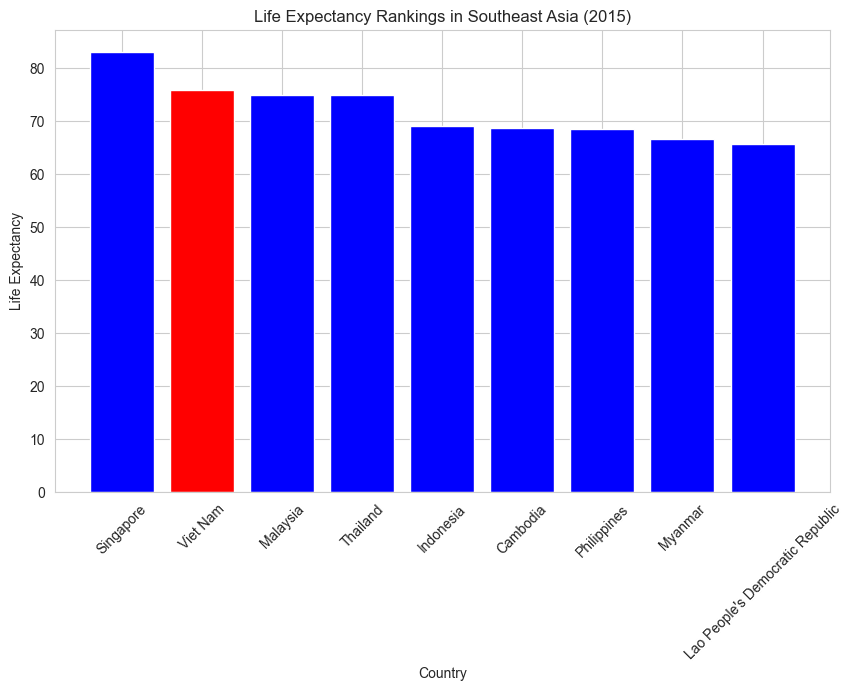

In [67]:
# Filter the data for Southeast Asian countries in the year 2015
df_sea_2015 = df_life[(df_life['Country'].isin(southeast_asian_countries)) & (df_life['Year'] == 2015)]

# Sort the data by life expectancy in descending order
df_sea_2015_sorted = df_sea_2015.sort_values('Life expectancy', ascending=False)

# Get the rank of Vietnam in 2015
vietnam_rank = df_sea_2015_sorted[df_sea_2015_sorted['Country'] == 'Viet Nam'].index[0] + 1

# Create a bar plot for life expectancy rankings in Southeast Asia (2015)
sns.set_style('whitegrid')
plt.figure(figsize=(10, 6))
plt.bar(df_sea_2015_sorted['Country'], df_sea_2015_sorted['Life expectancy'], color=['blue' if country != 'Viet Nam' else 'red' for country in df_sea_2015_sorted['Country']])
plt.xlabel('Country')
plt.ylabel('Life Expectancy')
plt.title('Life Expectancy Rankings in Southeast Asia (2015)')
plt.xticks(rotation=45)
plt.show()

#### Conclusions:
- The mean life expectancy of Vietnam is higher than the global average.
- From 2000, Vietnam's ranking in terms of life expectancy falls within the range of the top 47 to 59 countries. In 2004, Vietnam ranked 47th globally, which was the highest ranking among the years analyzed. However, in 2015, Vietnam dropped to the 59th position globally, which was the lowest ranking among the years analyzed. 
- The life expectancy of Vietnam, based on statistics from 2000, is significantly lower compared to the top 5 countries with the highest average life expectancy in the world.
- From 2011 to 2015, Vietnam maintained its second-highest position in terms of life expectancy among the countries in the Southeast Asian region. Singapore remained at the top of the region in terms of life expectancy.

In general, life expectancy in Vietnam is in the top of the average - high of the world. Besides, Vietnam is also the country in the top of the high life expectancy in Southeast Asia. 

## Prediction for Life Expectancy and Compare Vietnam with the World

### Autoregression Model (AR)

Implementing the model based on trend factors, our team found that it is possible to deploy an AR model(1) to predict life expectancy values. In terms of meaning, the AR(1) model is similar to the linear regression model. However, the AR model(1) has an element of autocorrelation between the observed values immediately before and immediately after to be able to predict for the next year.

\begin{equation}
x_t = \theta_0 + \theta_1 x_{t-1} + \theta_2 x_{t-2}+ ... + \epsilon_t
\end{equation}

with $t$ is timestamp, $\theta$ are regression parameters, $\epsilon$ is noise (not mentioned in this project).

In [68]:
world.index = pd.DatetimeIndex(world.index.values, freq=world.index.inferred_freq)
train, test = train_test_split(world, test_size=0.2, shuffle=False)

ar_model = AutoReg(train, lags=1).fit()
print(ar_model.summary())

                            AutoReg Model Results                             
Dep. Variable:                  World   No. Observations:                   12
Model:                     AutoReg(1)   Log Likelihood                   4.471
Method:               Conditional MLE   S.D. of innovations              0.161
Date:                Fri, 19 May 2023   AIC                             -2.941
Time:                        12:21:46   BIC                             -1.747
Sample:                    01-01-2001   HQIC                            -3.693
                         - 01-01-2011                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.6123      2.991     -0.874      0.382      -8.474       3.249
World.L1       1.0434      0.044     23.844      0.000       0.958       1.129
                                    Roots           

Plotting the predicted values and the actual values, we can see that the AR model(1) can predict the life expectancy values with an acceptable accuracy.

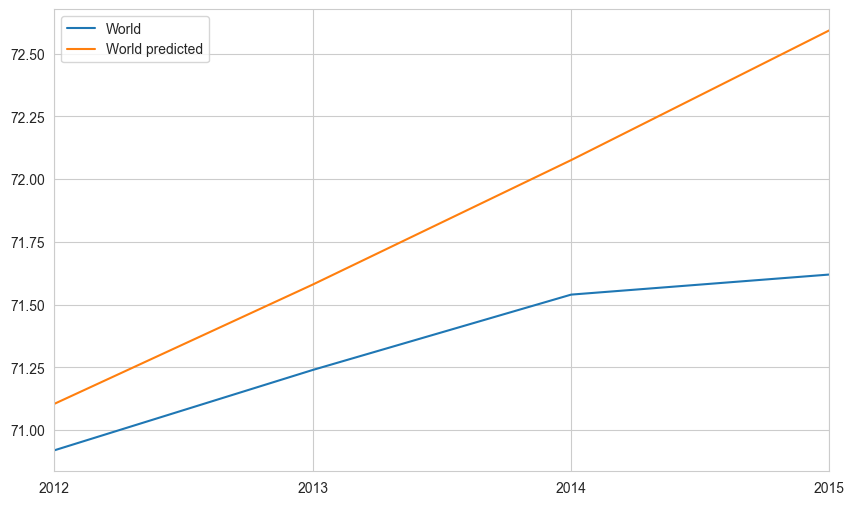

In [69]:
pred = ar_model.predict(start = len(train), end = (len(world)-1));
pred = pd.DataFrame({'World predicted': pred.values}, index = test.index)

# merge_pred = pd.concat([train, pred], axis=0).rename(columns={'World':'World predicted'})
comp = pd.concat([test, pred], axis=1)
comp.plot(kind='line');

AR(1) Error (Mean squared error) on test dataset.

In [70]:
print('MSE: ', mean_squared_error(test, pred))

MSE:  0.3458560636973308


As a result, we can use AR(1) model to predict life expectancy values in the near future.

#### Predicting average life expectancy worldwide in 2016 and 2017

In [71]:
ar_model = AutoReg(world, lags=1).fit()

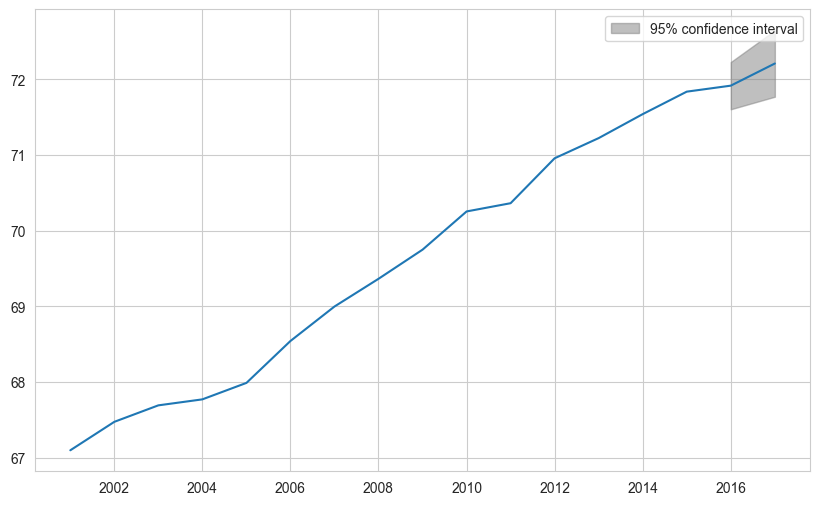

In [72]:
pred = ar_model.predict(start = len(world), end = (len(world)+1));
ar_model.plot_predict(start = 1, end = (len(world)+1), dynamic=False);

In [73]:
pred

2016-01-01   71.92
2017-01-01   72.21
Freq: AS-JAN, dtype: float64

The result predicts the average life expectancy worldwide in 2016 is 71.91 years, in 2017 it is 72.21 years. With a lag of 1 and confidence interval of 95%.

#### Vietnam Predictions for Life Expectancy in 2016 and 2017.

In [74]:
vn.index = pd.DatetimeIndex(vn.index.values, freq=vn.index.inferred_freq)

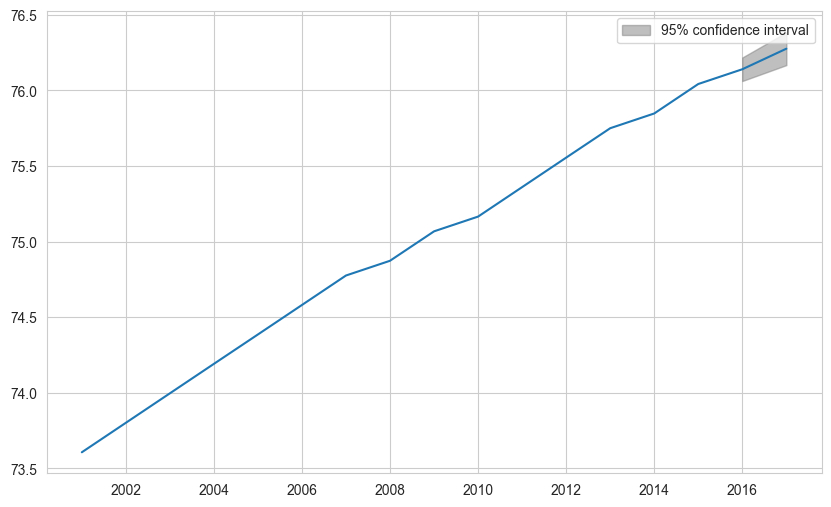

In [75]:
ar_model = AutoReg(vn, lags=1).fit()
pred_vn = ar_model.predict(start = len(vn), end = (len(vn)+1));
ar_model.plot_predict(start = 1, end = (len(vn)+1), dynamic=False);

In [76]:
pred_vn

2016-01-01   76.14
2017-01-01   76.28
Freq: AS-JAN, dtype: float64

### Regression analysis

#### Predict Life Expectation in the future (for Vietnam and World)

In [77]:
df['Year'] = pd.to_datetime(df['Year'], format='%Y').dt.year
train, test = df.loc[df.Year < 2014], df.loc[df.Year >= 2014]
X_train, y_train = train.drop('Life expectancy', axis=1), train.loc[:, ['Life expectancy']]
X_test, y_test = test.drop('Life expectancy', axis=1), test.loc[:, ['Life expectancy']]

In [78]:
cat_cols = ['Country', 'Status']
num_cols = ['Year'] + X_train.columns.tolist()[3:]
cat_pipe = make_pipeline(SimpleImputer(missing_values=np.nan, strategy='most_frequent'),
                        OneHotEncoder(handle_unknown='ignore'))
num_pipe = make_pipeline(SimpleImputer(missing_values=np.nan, strategy='mean'))
fill_missing = make_column_transformer(
    (num_pipe, num_cols),
    (cat_pipe, cat_cols)
)
preprocess_pipeline = Pipeline([
    ('fill_missing', fill_missing),
    ('scaler', StandardScaler(with_mean=False))
])

lr = LinearRegression()

pl = Pipeline([('preprocessing', preprocess_pipeline), ('regression', lr)])
model = pl.fit(X_train, y_train)

mean_squared_error(y_test, model.predict(X_test))

5.131470409529888

In [79]:
last_model = pl.fit(df.drop('Life expectancy', axis=1), df[['Life expectancy']])

#### Predict the life expectancy of Viet Nam in 2022

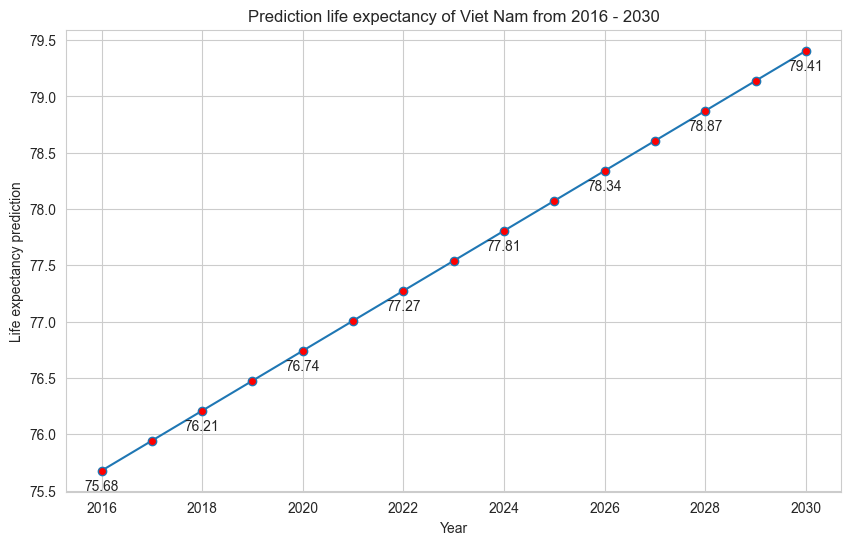

In [80]:
country = [['Viet Nam'] * (2031 - 2016)]
year = [list(range(2016, 2031, 1))]
nan_arr = [np.full(2031 - 2016, np.nan).tolist() for i in range(19)]
X = dict(zip(X_train.columns, country + year + nan_arr))
X = pd.DataFrame(X)

# predict
predictions = last_model.predict(X)

# visualization
plt.plot(list(range(2016, 2031)), predictions, marker='o', markerfacecolor='red')
for x in range(2016, 2031, 2):
    plt.text(x, predictions[x - 2016] - 0.2, round(predictions[x - 2016][0], 2), ha='center', va='bottom')
    
plt.xlabel('Year')
plt.ylabel('Life expectancy prediction')
plt.title('Prediction life expectancy of Viet Nam from 2016 - 2030')
plt.show();

### Conclusion:
- Life expectancy for Vietnam with AR(1) Model is 76.14 years in 2016 and 76.28 years in 2017.
- Life expectancy for the world with AR(1) Model is 71.91 years in 2016 and 72.21 years in 2017.
- Compare AR(1) Model and Regression Model:
    - AR(1) Model is better than Regression Model because AR(1) Model has lower MSE than Regression Model.
- We can obverse that the life expectancy in Vietnam is higher than the average life expectancy worldwide over time from 2000 to 2015.

## Which factors influence life expectancy the most?

In [81]:
def convertStatus(status):
    status_col = status.copy()
    status_col[status == "Developing"] = 0
    status_col[status != "Developing"] = 1
    return status_col

df["Status"] = convertStatus(df['Status'])

In [82]:
X = df.drop(columns = ["Country","Year","Life expectancy"])
y = df['Life expectancy']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2023)

In [ ]:
n_estimators = [50, 100, 150, 200]
max_features = [7, 10, 15, 19]
max_depth = [5, 6, 7]
min_split = [2, 3, 4] 
min_leaf = [1, 2, 3]
best_score = 100

for n in n_estimators:
    for f in max_features:
        for d in max_depth:
            for s in min_split:   
                for l in min_leaf:
                     rf = RandomForestRegressor(
                     n_estimators = n, 
                     criterion = 'mae', 
                     max_features= f,
                     random_state = 33, 
                     oob_score = False,
                     max_depth = d, min_samples_split = s, 
                     min_samples_leaf = l)
            rf.fit (X_train,y_train)    
            y_model = rf.predict(X_train)
            #score = mean_absolute_error(y, y_model)
            score = - np.mean(cross_val_score(rf, X_train, y_train, cv=4, scoring = 'neg_mean_absolute_error'))
            if score <= best_score:
                best_score = score
                max_n = n
                max_f = f
                max_d = d
                max_s = s
                max_l = l


print ("Number of Estimators:", max_n)               
print ("Max features:", max_f)
print ("Max Depth:", max_d)
print ("Min Split:", max_s)
print ("Min Leaf:", max_l)
print("Best Mean Absolute Error: {:.3f}".format(best_score))

In [ ]:
clf = RandomForestRegressor(
                     n_estimators = max_n, 
                     criterion = 'mae', 
                     max_features= max_f,
                     random_state = 33, 
                     oob_score = False,
                     max_depth = max_d, min_samples_split = max_s, 
                     min_samples_leaf = max_l)
clf.fit(X_train, y_train)

RandomForestRegressor(criterion='mae', max_depth=7, max_features=15,
                      min_samples_leaf=3, min_samples_split=4, random_state=33)

In [ ]:
feature_imp = pd.Series(clf.feature_importances_,index=clf.feature_names_in_).sort_values(ascending=False)
feature_imp

 HIV/AIDS                          0.379045
Adult Mortality                    0.280811
Income composition of resources    0.209347
Schooling                          0.030993
 thinness 5-9 years                0.016351
 BMI                               0.015994
 thinness  1-19 years              0.014912
Alcohol                            0.014475
under-five deaths                  0.007168
Polio                              0.005503
infant deaths                      0.004973
Hepatitis B                        0.003862
Diphtheria                         0.003785
GDP                                0.003218
Total expenditure                  0.003123
percentage expenditure             0.002480
Measles                            0.002233
Population                         0.001727
Status                             0.000000
dtype: float64

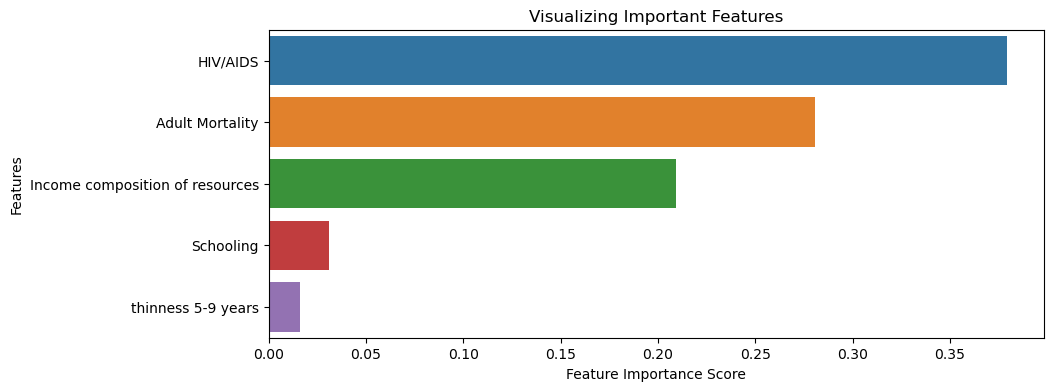

In [ ]:
# Creating a bar plot
sns.barplot(x=feature_imp[:5], y=feature_imp[:5].index)

plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

#  Solution

If a country want to improve their life expectency, the most important thing they should are:


  - Prevent HIV/AIDS 
  -  Care in take care of adults
  -  Optimal utilization of available resources
  -  Invest in education
  -  Focus on nutrition for children 5 - 9 years

## What factor should be changed to increase life expectancy?

We found in this part that: The higher life expectancy, the higher BMI, GDP, education and income composition of resource. In contrast of life expectancy, there are HIV/AIDS (most effect), infant death, thinnes of 1-19 years. So, if a country want to increase their life expectancy, they should increase their GDP, education, income composition of resource. And they should control HIV/AIDS, infant death, thinnes of 1-19 years proportion.
- HIV/AIDS: HIV/AIDS is a disease that is transmitted through sexual contact, blood transfusion, and contaminated hypodermic needles. It is a disease that affects the human immune system.
- Infant death: Infant mortality is the death of young children under the age of 1. This death toll is measured by the infant mortality rate (IMR), which is the number of deaths of children under one year of age per 1000 live births. There are many factors causes infant death such as birth defects, infections, SIDS, low birth weight, maternal pregnancy complications, and injuries.
- thinnes of 1-19 years: focus on nutrition.

Moreover, if a country is developed, their life expectancy will be higher regardless of any attributes.

## For Vietnam in particular, what factors need to be changed most to increase the average life expectancy?

Viet Nam has its own characteristics, when we take observation on Viet Nam, its life expectancy is higher than average life expectancy worldwide. It's really a big success from Viet Nam and be to said that we are proud of this. However, there are still some factors that need to be changed to increase the average life expectancy of Viet Nam. They are:
- thinnes of 1-19 years: its proportion is still high, although it is decreasing over time.
- Developing: Viet Nam is a developing country, so I think we should focus on developing our country to increase our life expectancy.

References: 
- https://www.kaggle.com/code/varunsaikanuri/life-expectancy-visualization

